<a href="https://colab.research.google.com/github/panicoro/FS-course-data-ai/blob/master/1_3_Datos_faltantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ciencia de Datos e Inteligencia Artificial para la industria del software**

## **Edición 2024**

---
## 1.3. Datos faltantes

![](https://imgur.com/68u0dD2.png)

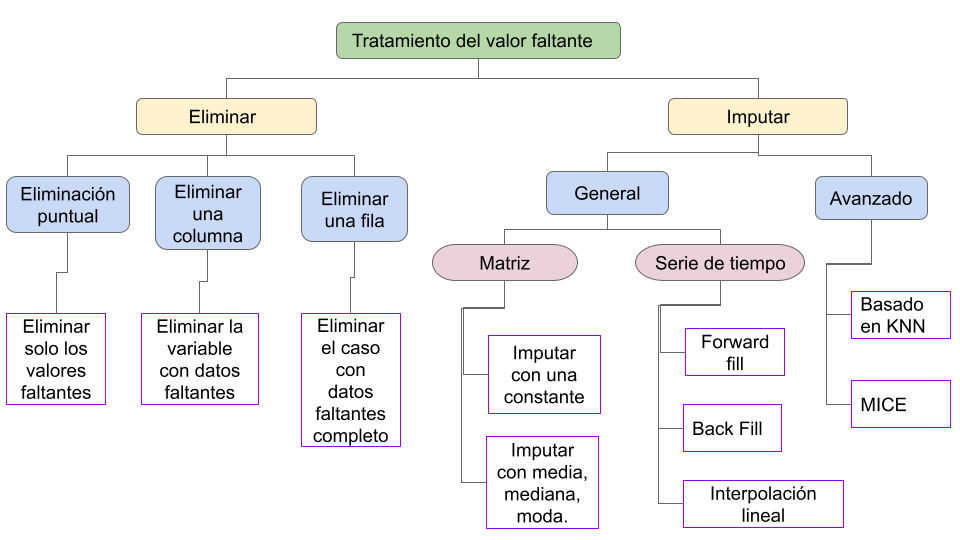

>Los datos del mundo real son confusos y suelen contener datos faltantes. Pueden ser múltiples las razones que justifiquen la ausencia de aquellos valores, pero principalmente la razón suele atribuirse a:

| Razón de la falta de datos
|--|
|Los datos no existen.
|Datos no recogidos debido a un error humano.  |
|Datos borrados accidentalmente |
| |

 En cualquiera de estos casos, tenemos que resolver este problema antes de proceder con el modelado y análisis. Por otra parte, cabe destacar que algunos algoritmos como el `XGBoost` y `LightGBM` pueden tratar los datos faltantes sin ningún tipo de preprocesamiento.

Una de las conclusiones más importantes de trabajar con información es que los datos nunca se organizan, ni se recolectan de forma simple. Los datos del mundo real, al combinar diferentes características y calificaciones de objetos y sujetos muchas veces contienen errores,  lo que requiere una limpieza significativa (y, a menudo, experiencia de dominio) para ser utilizables. Esto es lo que se refiere con ruido en los datos.

Casi todos los conjuntos de datos contienen algo de ruido, y cuanto menos ruido haya, mejor ("más limpio") será el conjunto de datos. Algunos tipos de ruido son más fáciles de corregir que otros. A veces, eliminar el ruido por completo es simplemente imposible y todo lo que puede hacer es volver a muestrear o esperar lo mejor, teniendo en cuenta que en procesamiento de datos, <span style="color:FireBrick">**cuando entra basura, sale basura.**</span>

### Tipos de datos faltantes

* El <span style="color:FireBrick">**dato erróneo**</span>  es un dato recolectado con algun error, que lo separa de la generalidad. Debe ser inspeccionado y tratado especialmente para determinar si es un <span style="color:FireBrick">**ruido**</span> o un dato importante con baja probabilidad de ocurrir, es decir un  <span style="color:FireBrick">**dato atípico**</span> o <span style="color:FireBrick">**outlier**</span>.

* El <span style="color:FireBrick">**dato faltante**</span> es el un dato que no esta registrado en la database. Dependiendo como se hayan recolectado los datos y escrito el archivo de datos, pueden estar marcados con un <span style="color:FireBrick">**NaN**</span>, o con un número fuera de rango, como <span style="color:FireBrick">**0**</span> o <span style="color:FireBrick">**-1**</span>. Es muy importante reconocer la codificación de datos faltantes, para no confundirlos con un dato válido recolectado.

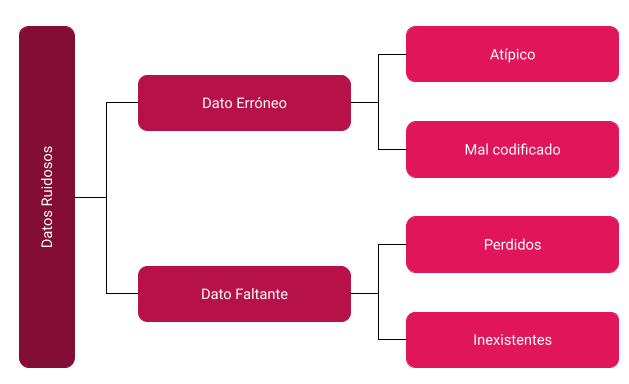


### Datos Erróneos

Los datos erróneos se dividen en <span style="color:FireBrick">**datos atípicos**</span> y <span style="color:FireBrick">**datos mal codificados**</span>.

Los <span style="color:FireBrick">**datos atípicos**</span> son datos reales, sin embargo, pueden producir demasiada palanca sobre los estadisticos de tendencia central y desviacion, lo cual los hace candidatos a ser retirados del dataset.

Los <span style="color:FireBrick">**datos mal codificados**</span> son la fuente de error mas comun, que en muchos casos no puede ser detectada. Es importante detectar cuando los datos faltantes fueron codificados como valores fuera de rango, por ejemplo el valor <span style="color:FireBrick">**cero**</span>. Este error suele aparecer cuando se mezclan databases con distinta codificacion de datos faltantes

### Datos Faltantes

Los datos faltantes se dividen en <span style="color:FireBrick">**datos perdidos**</span> y <span style="color:FireBrick">**datos inexistentes**</span>.

* Un <span style="color:FireBrick">**dato perdido**</span> es un dato que uno sabe que existe pero dada una recolección fallida o incompleta, no se conoce su valor.

* Un  <span style="color:FireBrick">**dato inexistente**</span> es un dato faltante pues no existe. Esto es, no puede ser recolectado.

Python no reconoce la diferencia, por lo cual uno debe ser muy cauteloso cuando trabaja con datos de ambas clases. Al leer un archivo con espacios en blanco, automáticamente asigna a ese dato un <span style="color:FireBrick">**NaN**</span> numérico con capacidad de ser imputado.

Sin embargo,  en Python existe el objeto <span style="color:FireBrick">**None**</span>, el cual es un single null datatype. El dato <span style="color:FireBrick">**NaN**</span> puede ser usado como valor numérico en operaciones matematicas, mientras que <span style="color:FireBrick">**None**</span> no, o al menos no debería.

* <span style="color:FireBrick">**NaN**</span> es un valor numérico, definido en IEEE 754 floating-point standard.

* <span style="color:FireBrick">**None**</span> es un internal Python type (NoneType) y es mas parecido al ''no existente'' o "vacio" que al  "numerically invalid" en este contexto.

¿Por qué no puede usarse <span style="color:FireBrick">**None**</span> como el dato nulo? porque Numpy y Pandas no propagan estos datos a traves de operaciones aritméticas, y para evitar usarlo en un algoritmo hay que testear cada dato para ver si es **None**.

<hr>


# Objetivo

El objetivo de esta clase recae en la caracterización y el estudio de valores ausentes, las técnicas implementadas para su análisis y su tratamiento.
<hr>


# Datos

Existen dos conjuntos de datos de acceso público que se utilizarán para explicar los conceptos:

* 1. [Titanic Dataset](https://www.kaggle.com/c/titanic) para el problema de datos no en series temporales
* 2. [Air Quality Data in India (2015 - 2020)](https://www.kaggle.com/rohanrao/air-quality-data-in-india) para el problema de datos en forma de series temporales


# Importar librerias necesarias y conjuntos de datos

In [ ]:
# importamos librerias
# datos
import os
import pandas as pd
import numpy as np

#visual
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#modelos
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
pathCurso = '/content/drive/MyDrive/CCDAA/Data/'

ruta_archivo_titanic_test = pathCurso + "titanic_test.csv"
ruta_archivo_titanic_train = pathCurso + "titanic_train.csv"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



## Lectura en el conjunto de datos
* Lectura en el conjunto de datos Titanic.

In [ ]:
ruta_archivo_titanic_test = pathCurso + "titanic_test.csv"
ruta_archivo_titanic_train = pathCurso + "titanic_train.csv"

train = pd.read_csv(ruta_archivo_titanic_train)
test = pd.read_csv(ruta_archivo_titanic_test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

# First few rows of the training dataset
train.head(10)


Training data shape:  (891, 12)
Testing data shape:  (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Data Dictionary
| Variable	| Definition |	Key |
|-------|-------|--------|
|survival	| Survival	| 0 = No, 1 = Yes |
|pclass	| Ticket class |	1 = 1st, 2 = 2nd, 3 = 3rd |
|sex |	Sex	| |
|Age |	Age in years	| |
|sibsp |	# of siblings / spouses aboard the Titanic	| |
|parch |	# of parents / children aboard the Titanic	| |
|ticket	| Ticket number	| |
|fare	| Passenger fare	| |
|cabin	| Cabin number	| |
|embarked |	Port of Embarkation |	C = Cherbourg, Q = Queenstown, S = Southampton |

Podria suceder que los datos ausentes no estuviesen catalogados en el set de datos bajo la forma de NaN, si no que simplemente tengan valores nulos (0), por este motivo es muy importante llevar a cabo un análisis exploratorio de los datos para determinar a qué tipo de dato ausente nos estamos enfrentando.

In [ ]:
cols = train[train == 0].count(axis=0)
cols[cols > 0]

Survived    549
SibSp       608
Parch       678
Fare         15
dtype: int64

## Examinar la columna objetivo

>El objetivo del problema es predecir si los pasajeros sobrevivieron o no al hundimiento del Titanic. De esta forma la columna Survivied (Sobrevivieron) es la columna objetivo del conjunto de datos. Examinemos la distribución de la columna objetivo

In [ ]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

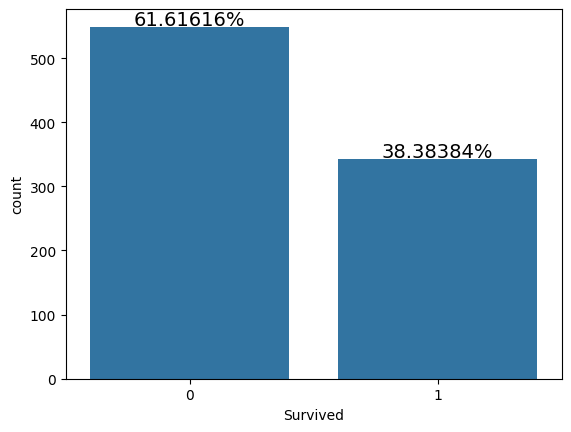

In [ ]:
# gráfica countplot
# https://seaborn.pydata.org/generated/seaborn.countplot.html
s = sns.countplot(x = 'Survived',data = train)
sizes=[]
for p in s.patches:
    height = p.get_height()
    sizes.append(height)
    s.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:8.5f}%'.format(height/len(train)*100),
            ha="center", fontsize=14)

Aquí:
* 0: No sobrevivió
* 1: Sobrevivió.

Claramente, menos personas sobrevivieron al accidente

>Dado que el enfoque del cuaderno es detectar y manejar valores perdidos, saltaremos directamente a ello. Veamos ahora un proceso paso a paso para gestionar los valores perdidos en un conjunto de datos.
<hr>

# Detección de valores ausentes

## Detección numérica de valores perdidos

>El primer paso es detectar el porcentaje/recuento de valores ausentes en cada columna del conjunto de datos. Esto nos dará una idea de la distribución de los valores ausentes.

### Consecuencias

- La falta de datos puede limitar nuestra capacidad para realizar tareas importantes de ciencia de datos, como convertir tipos de datos o visualizar datos.

- Los datos faltantes pueden reducir el poder estadístico de nuestros modelos, lo que a su vez aumenta la probabilidad de error de tipo II. El error de tipo II es la imposibilidad de rechazar una hipótesis nula falsa.

- Los datos faltantes pueden reducir la representatividad de las muestras en el conjunto de datos.

- La falta de datos completos puede distorsionar la validez de los ensayos científicos y puede llevar a conclusiones inválidas.

Las bibliotecas de Python representan los números faltantes como <span style="color:FireBrick">**NaN**</span>, que es la abreviatura de "no es un número". Vamos a detectar qué celdas tienen valores perdidos y luego contar cuántos hay en cada columna con el comando: df.isna() y el df.info()

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
?pd.DataFrame.isna

In [ ]:
missing_values_count = train.isna().sum()
missing_values_count

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* Función para el análisis exploratorio de datos ausentes en un conjunto de datos

In [ ]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns



In [ ]:
train_missing = missing_values_table(train)
train_missing

Your selected dataframe has 12 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


In [ ]:
test_missing= missing_values_table(test)
test_missing

Your selected dataframe has 11 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2


Tanto el conjunto de entrenamiento como el de testeo tienen la misma proporción de valores ausentes.

## Detección visual de datos ausentes mediante la biblioteca Missingno

>Para analizar gráficamente la falta de datos, vamos a utilizar una biblioteca llamada [Missingno](https://github.com/ResidentMario/missingno) Es un paquete para el análisis gráfico de valores ausentes. Para utilizar esta biblioteca, tenemos que importarla de la siguiente manera: `import missingno as msno`

In [ ]:
import missingno as msno

<Axes: >

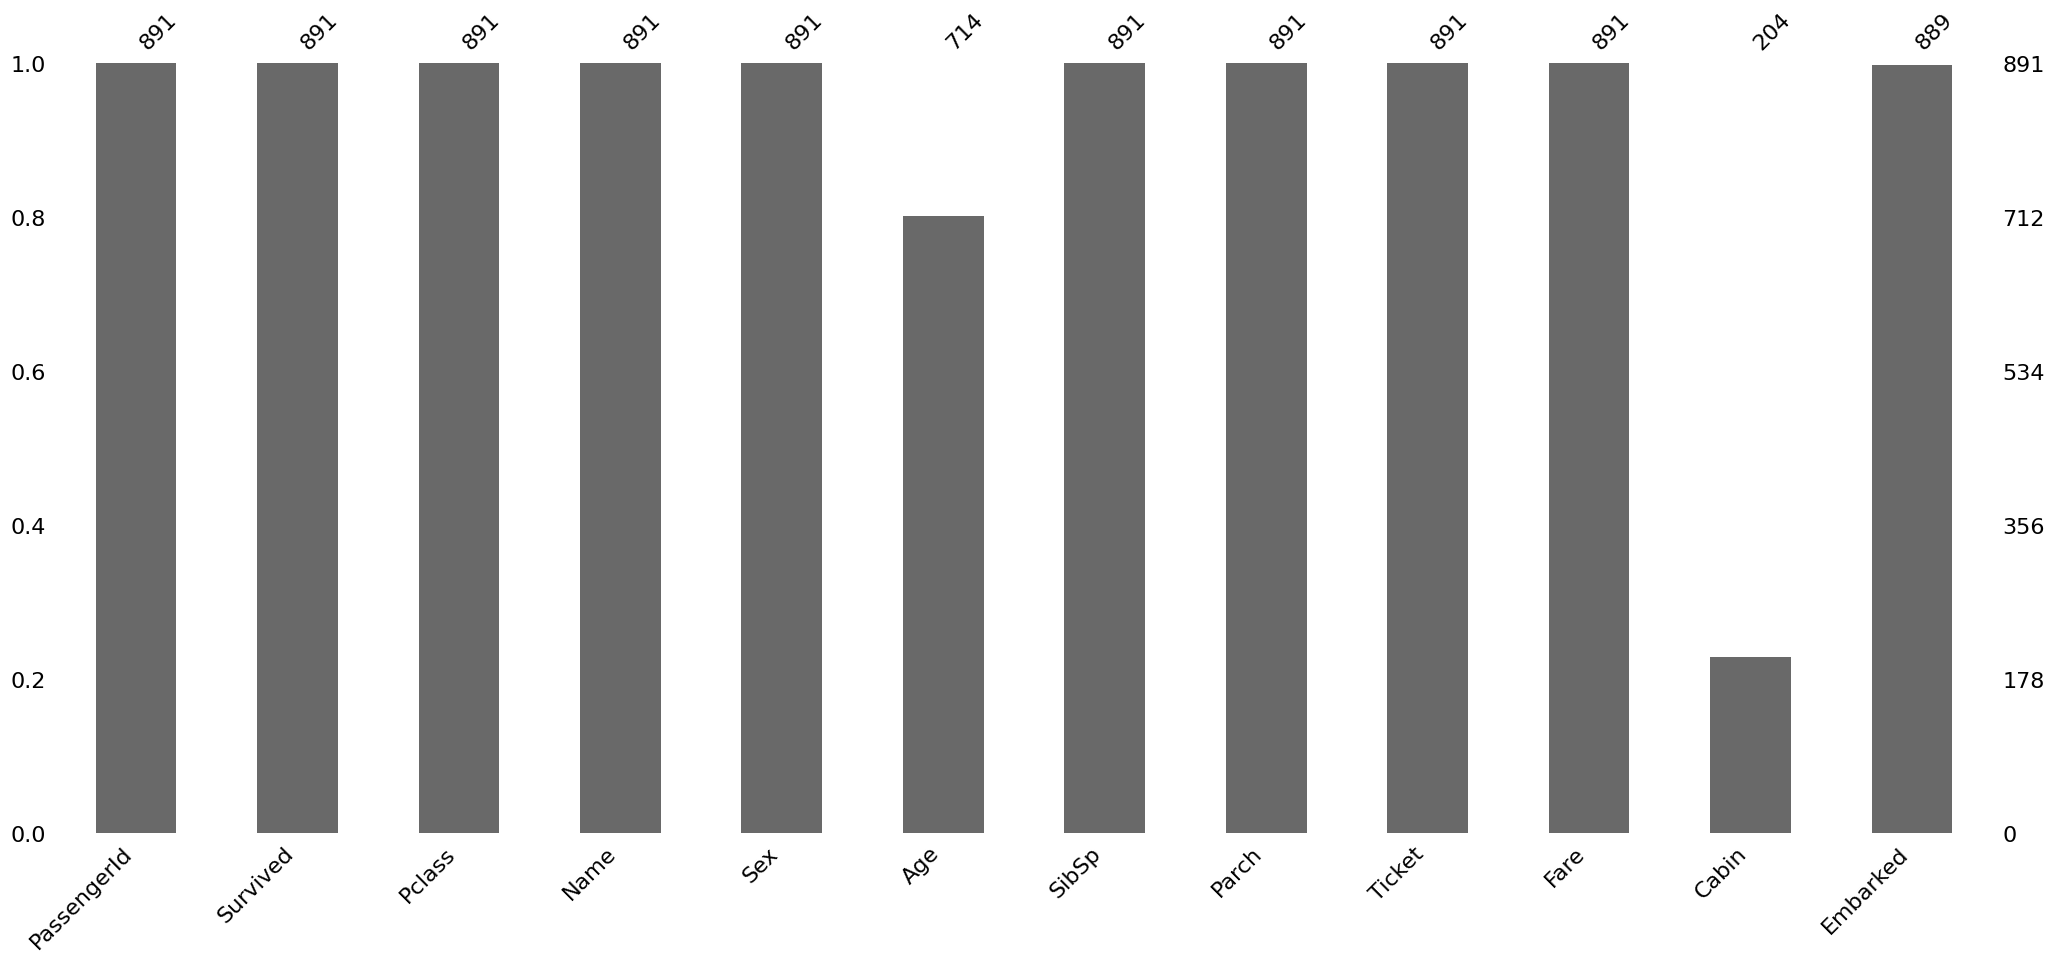

In [ ]:
msno.bar(train)

>El gráfico de barras anterior ofrece una rápida visión gráfica de la completitud del conjunto de datos. Podemos ver que en las columnas Edad, Cabina y Embarcado existen valores ausentes. A continuación, sería conveniente determinar la ubicación de los datos que faltan.

### Visualización de las ubicaciones de los datos que faltan

>La matriz de nulidad [msno.matrix](https://github.com/ResidentMario/missingno#matrix) es una visualización de datos que permite distinguir rápidamente patrones visuales en la completitud de los datos.

<Axes: >

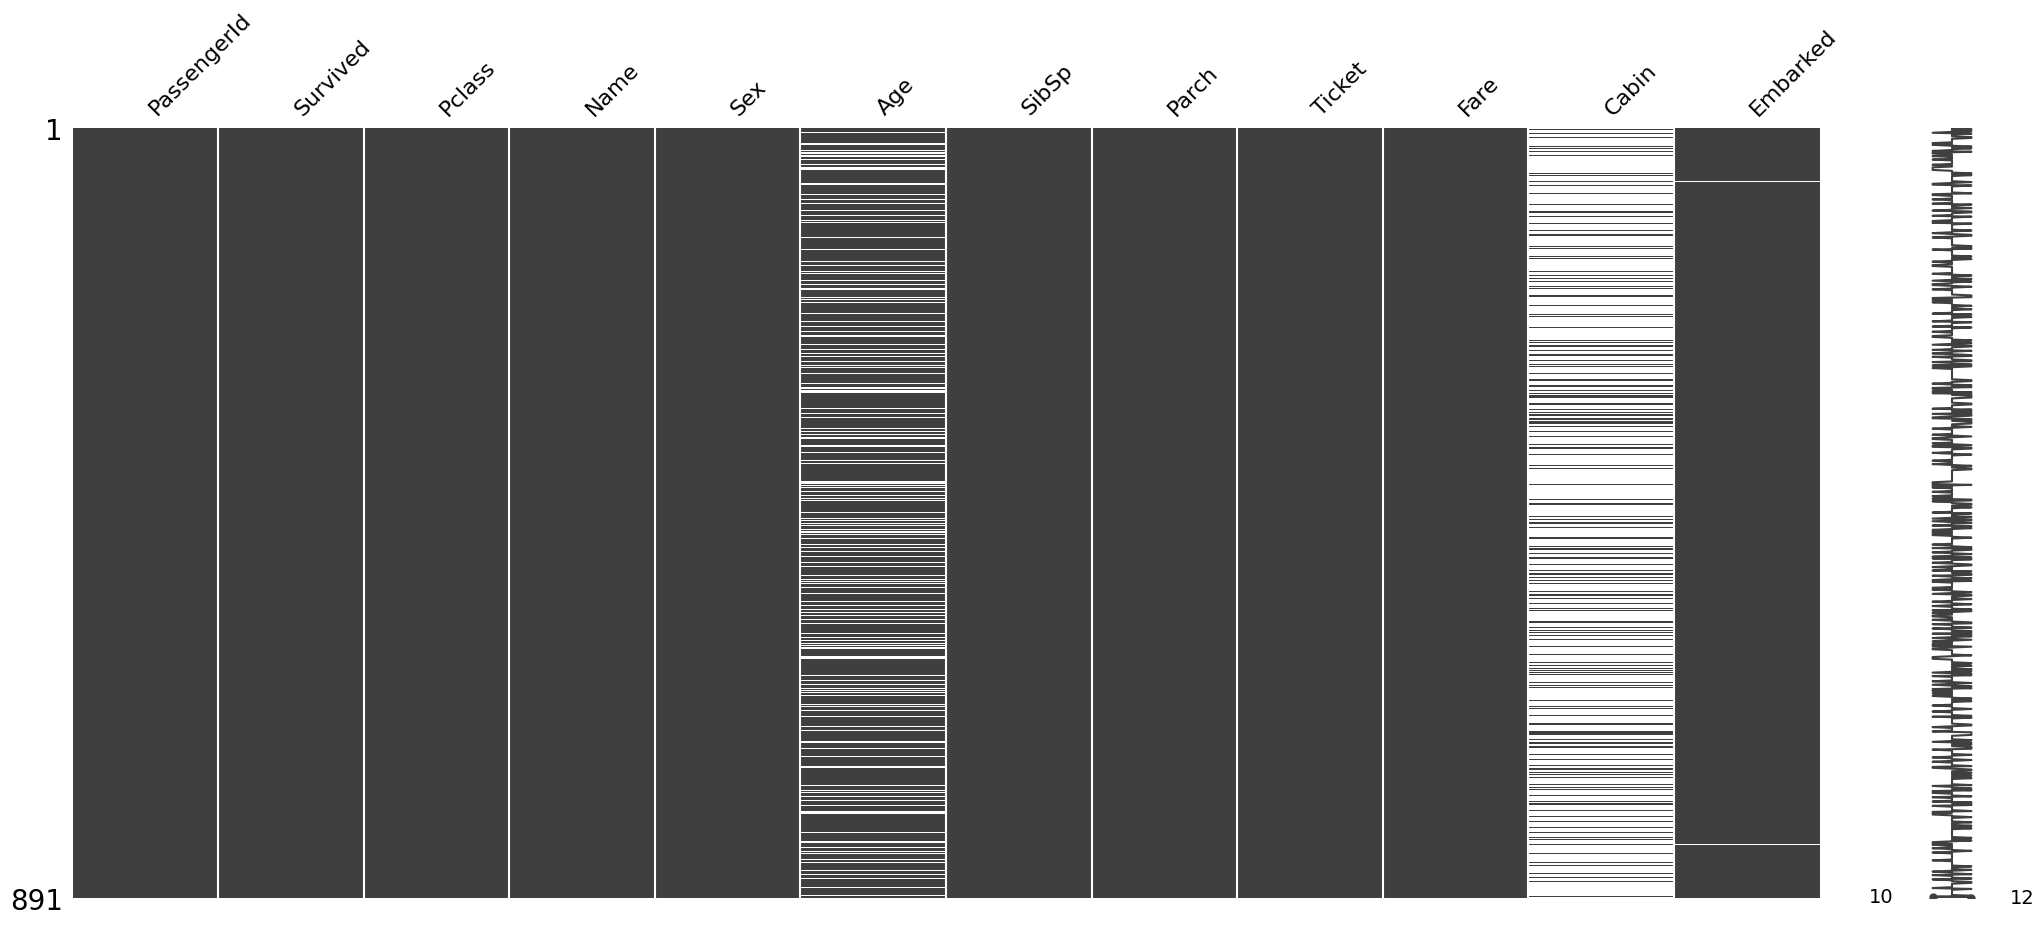

In [ ]:
msno.matrix(train)

>* El gráfico aparece en blanco cuando faltan valores. Por ejemplo, en la columna Embarcado sólo faltan dos datos, de ahí las dos líneas blancas.
>
>* El gráfico de la derecha da una idea de la forma general de la completitud de los datos y señala la fila con el máximo de nulos y el número total de columnas en un conjunto de datos determinado, en la parte inferior.
>
>También es posible muestrear el conjunto de datos para localizar con exactitud los valores que faltan. Por ejemplo, comprobemos las 100 primeras filas.

<Axes: >

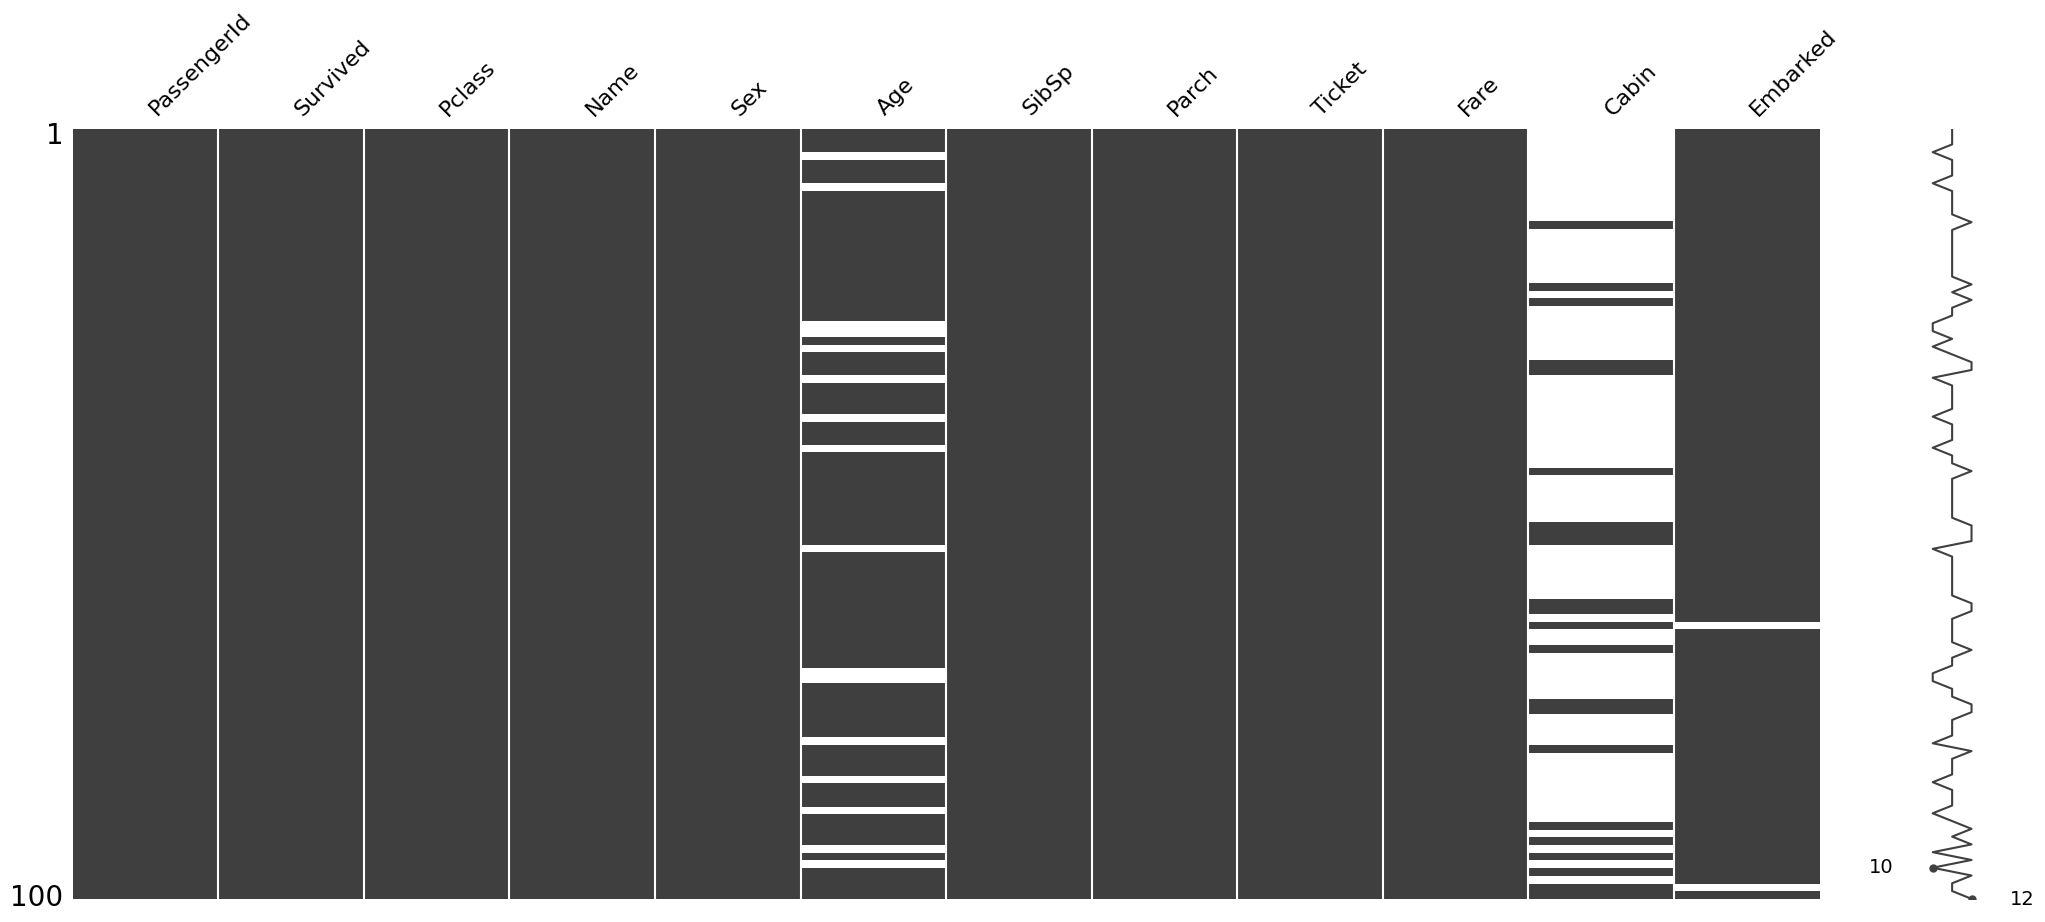

In [ ]:
msno.matrix(train.sample(100))

Esto demuestra que la columna Embarcado no tiene ningún nulo en los 100 primeros casos.

# Razones de los datos faltantes (mecanismos)


**1. Ausencia completamente al azar (Missing Completely at Random) (MCAR)**.

>Los valores que se ausentan en una determinada variable (Y) no están asociados a otras variables de un determinado conjunto de datos ni a la propia variable (Y). En otras palabras, no hay ninguna razón particular para los valores que faltan.

**2. Ausencia al azar (Missing at Random) (MAR)**

>La ausencia al azar se produce cuando la falta no es aleatoria, sino que puede explicarse plenamente por variables de las que se dispone de información completa.

**3. Ausencia no aleatoria (Missing Not at Random) (MNAR)**
>La omisión depende de datos no observados o del valor de los propios datos omitidos.


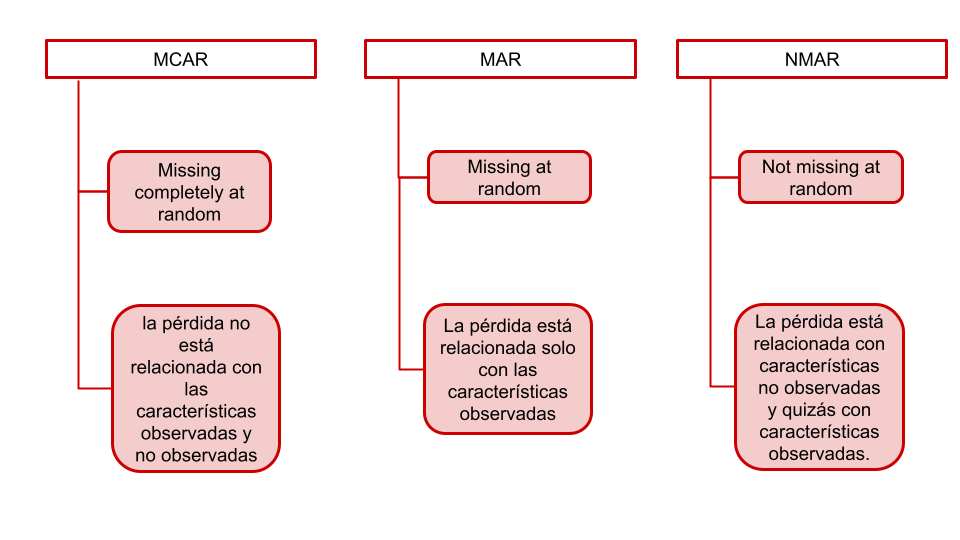

>Ahora veamos de nuevo la matriz de nulidad para ver si podemos encontrar qué tipo de missingness está presente en el conjunto de datos.


## Encontrar la razón de los datos que faltan usando el gráfico matricial

<Axes: >

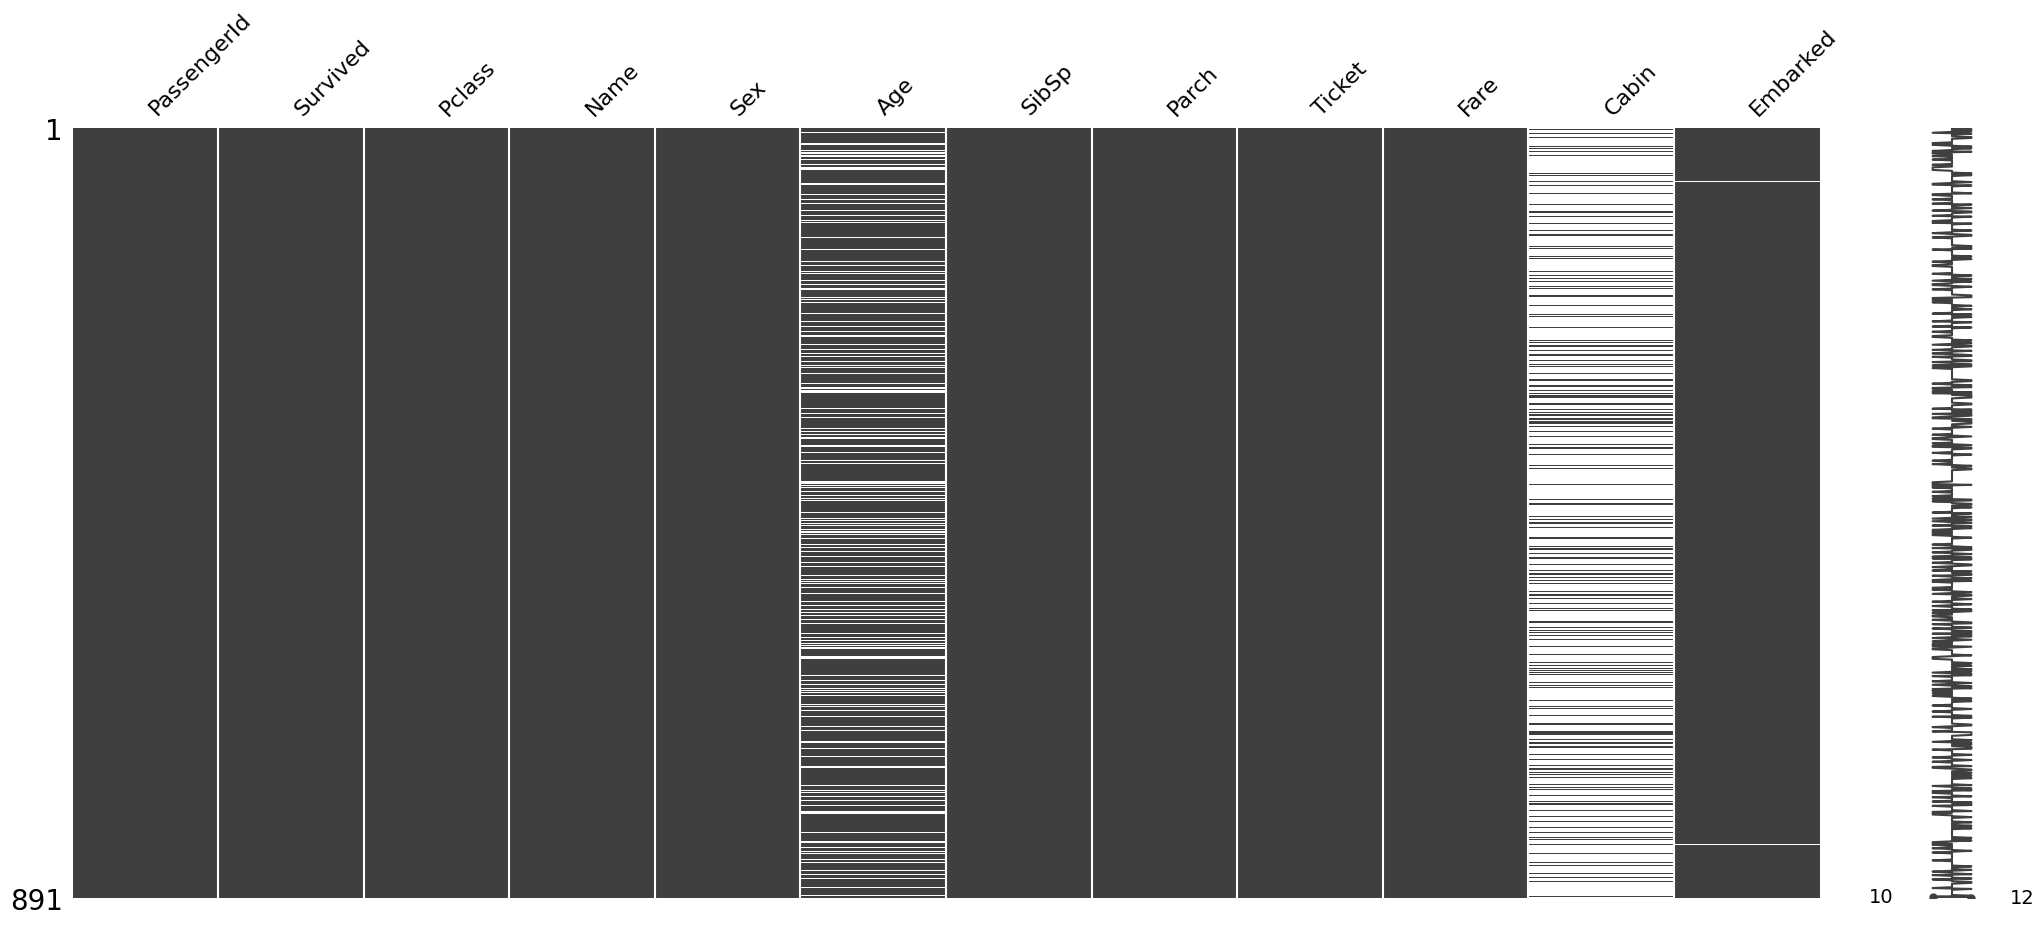

In [ ]:
msno.matrix(train)

>* La columna `Embarked` tiene muy pocos valores ausentes y no parecen encontrarse correlacionada con ninguna otra columna. Por lo tanto, la omisión en la columna `Embarked` puede atribuirse a una omisión completamente aleatoria.
* Tanto la columna `Age`  como la columna `Cabin` tienen muchos valores ausentes, lo que podría ser un caso de MAR, ya que no podemos observar directamente la razón por la que faltan datos en estas columnas.

El paquete missingno también nos permite ordenar el gráfico por los valores de una columna determinada. Vamos a ordenar los valores por las columnas `Age` y `Cabin` para ver si hay un patrón en los valores que faltan


<Axes: >

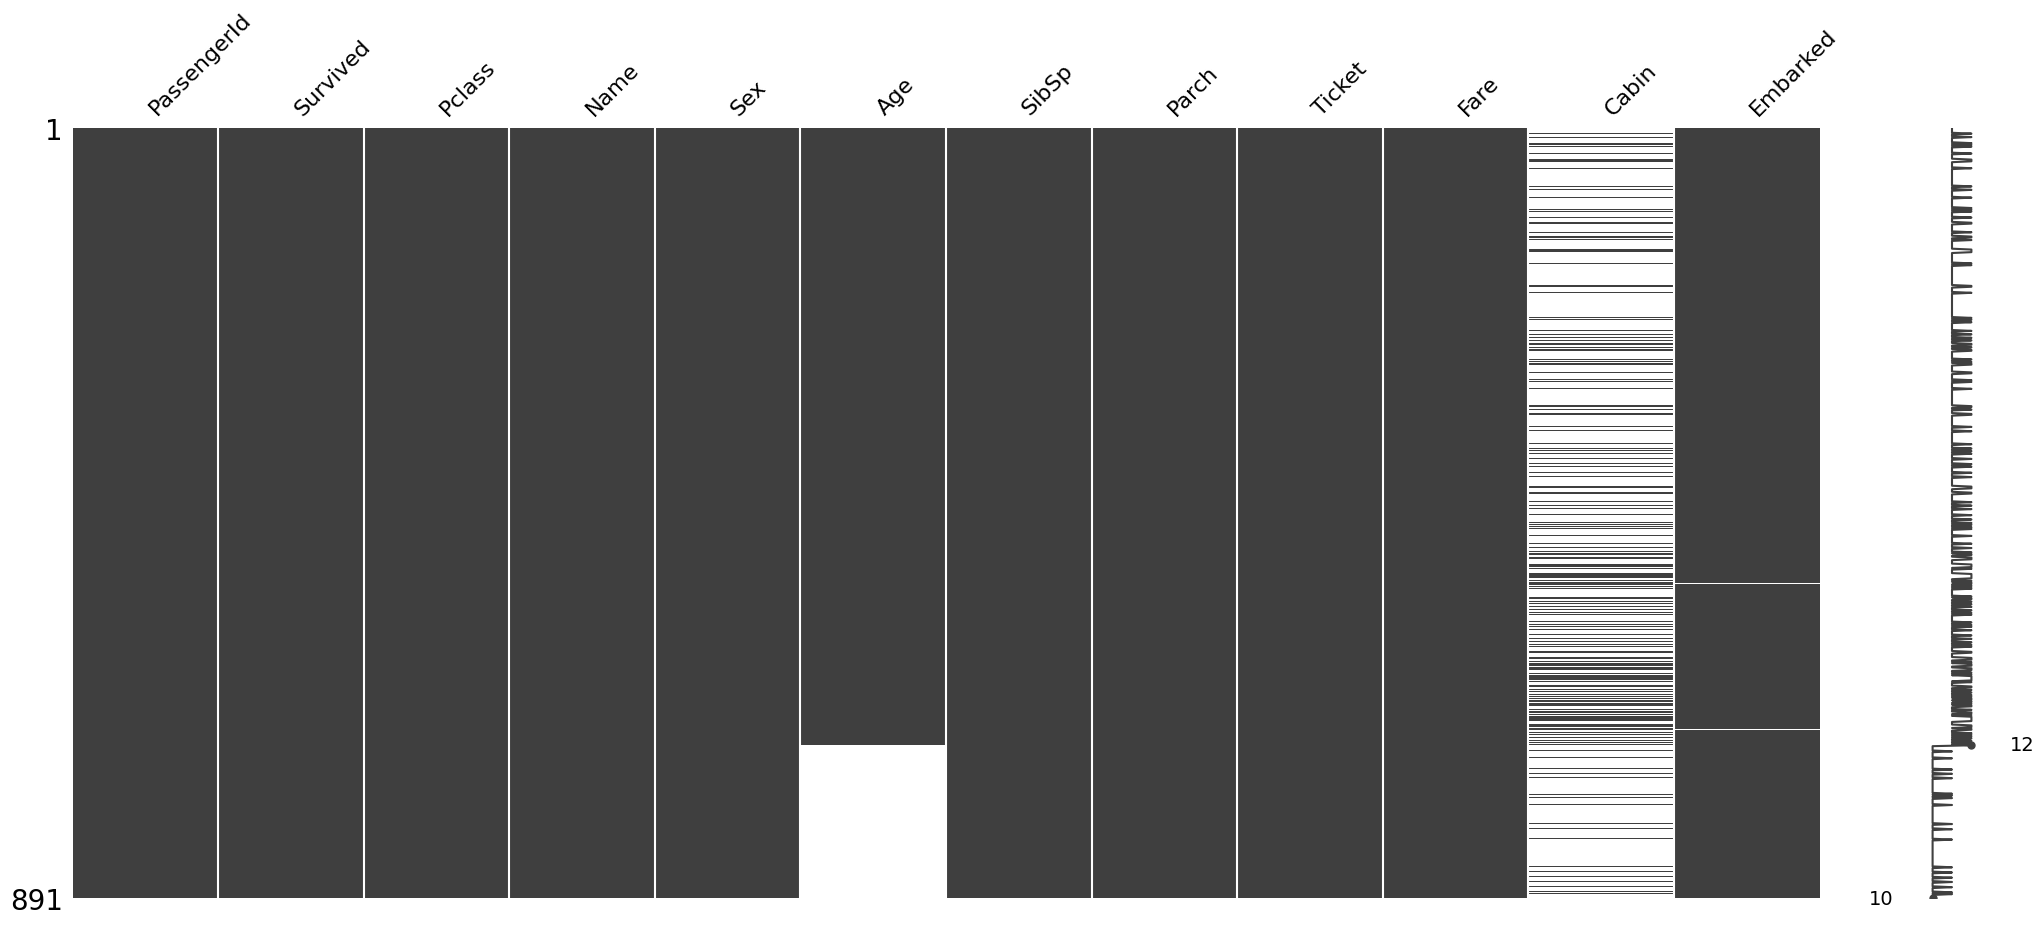

In [ ]:
#sorted by Age
sorted = train.sort_values('Age')
msno.matrix(sorted)

Por lo tanto, está claro que no hay relación entre la falta de datos en la columna Edad y Cabina. Para consolidar aún más esta conclusión, también podemos dibujar un mapa de calor entre las diferentes variables del conjunto de datos.

##  Encontrar el motivo de la falta de datos mediante un Heatmap (correlacion)

La existencia de correlacion entre la presencia ausencia de datos faltantes en determinadas variables es una muestra de la falta de aleatoriedad del mecanismo de perdida. Aun asi, puede existir una relacion entre las variables que permita imputar el dato perdido como funcion de los datos relevados.

Abajo estamos mostrando un heatmap de correlaciones entre las columnas que tienen datos faltantes.

La correlación toma valores entre -1 y 1.

* -1 - Correlacion negativa exacta implica que si el valor de una variable está presente, en la otra esta ausente.

* 0 - Falta de correlacion implica que no se puede ver una relación lineal.

* 1 - Correlacion positva exacta implica que si una variable tiene valor, en la otra definitivamente va a tomar valor tambien.

<Axes: >

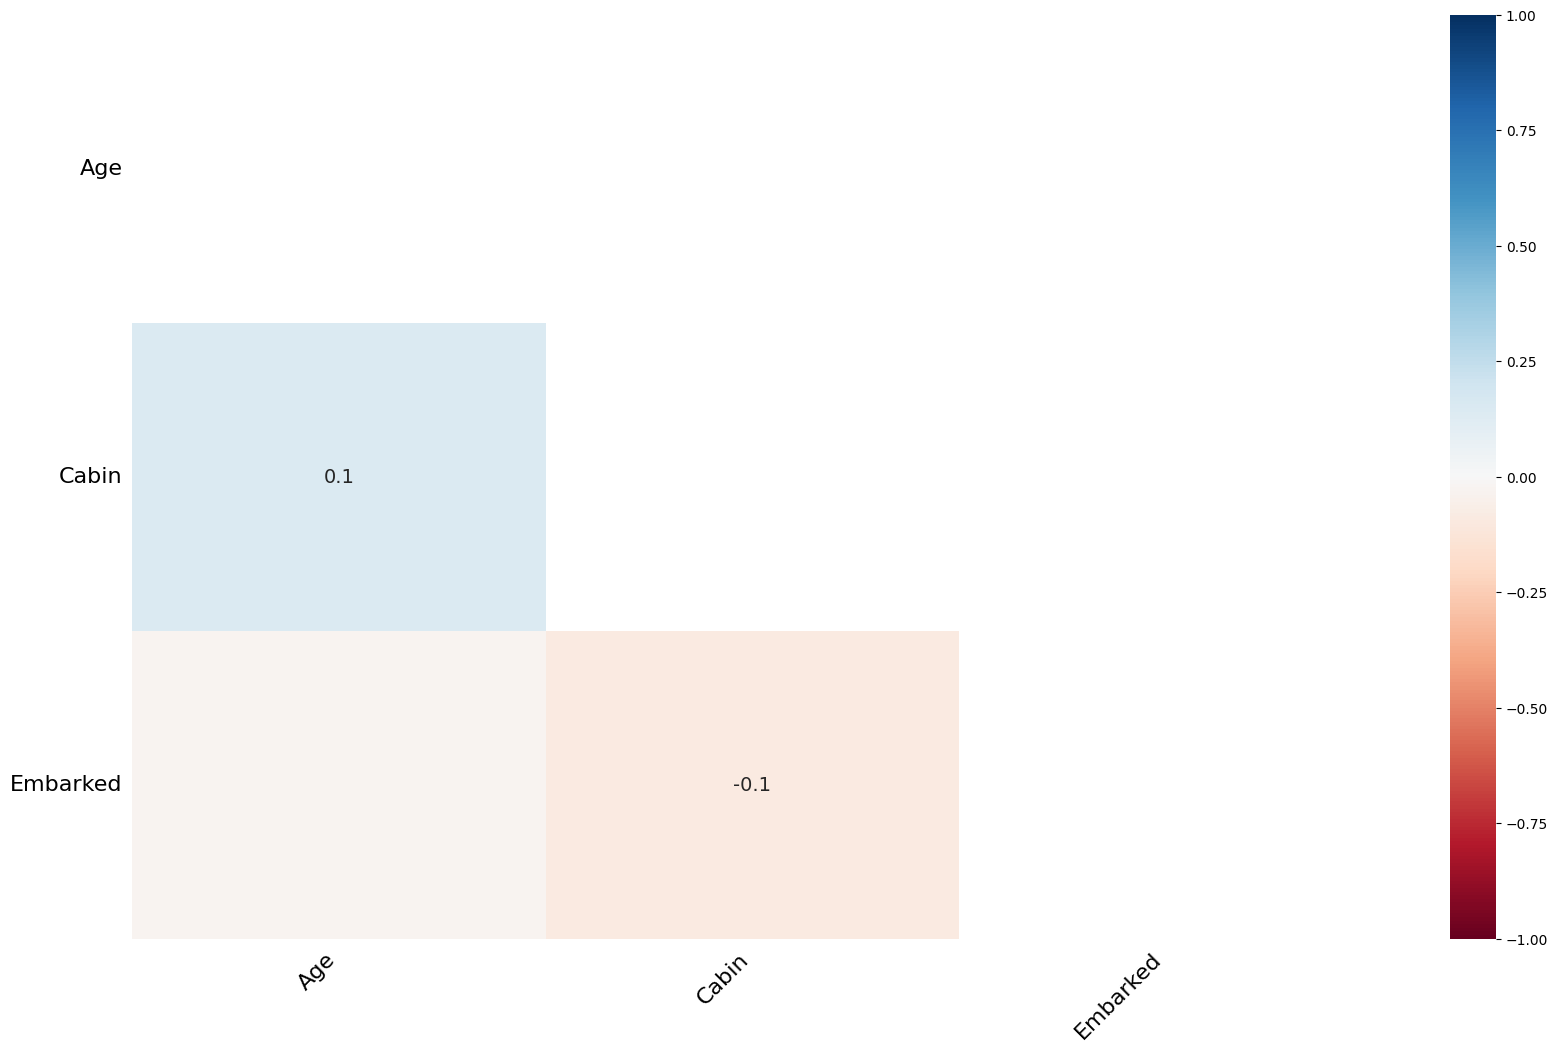

In [ ]:
msno.heatmap(train)

La función de mapa de calor muestra que no hay correlaciones fuertes entre los valores que ausentes de las distintas variables. Esto es bueno; las correlaciones bajas indican además que los datos son MAR.

## Encontrar la razón de los datos faltantes mediante un dendograma
Un dendograma es un diagrama de árbol de la falta de datos. Agrupa las variables altamente correlacionadas.

In [ ]:
train.tail(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


<Axes: >

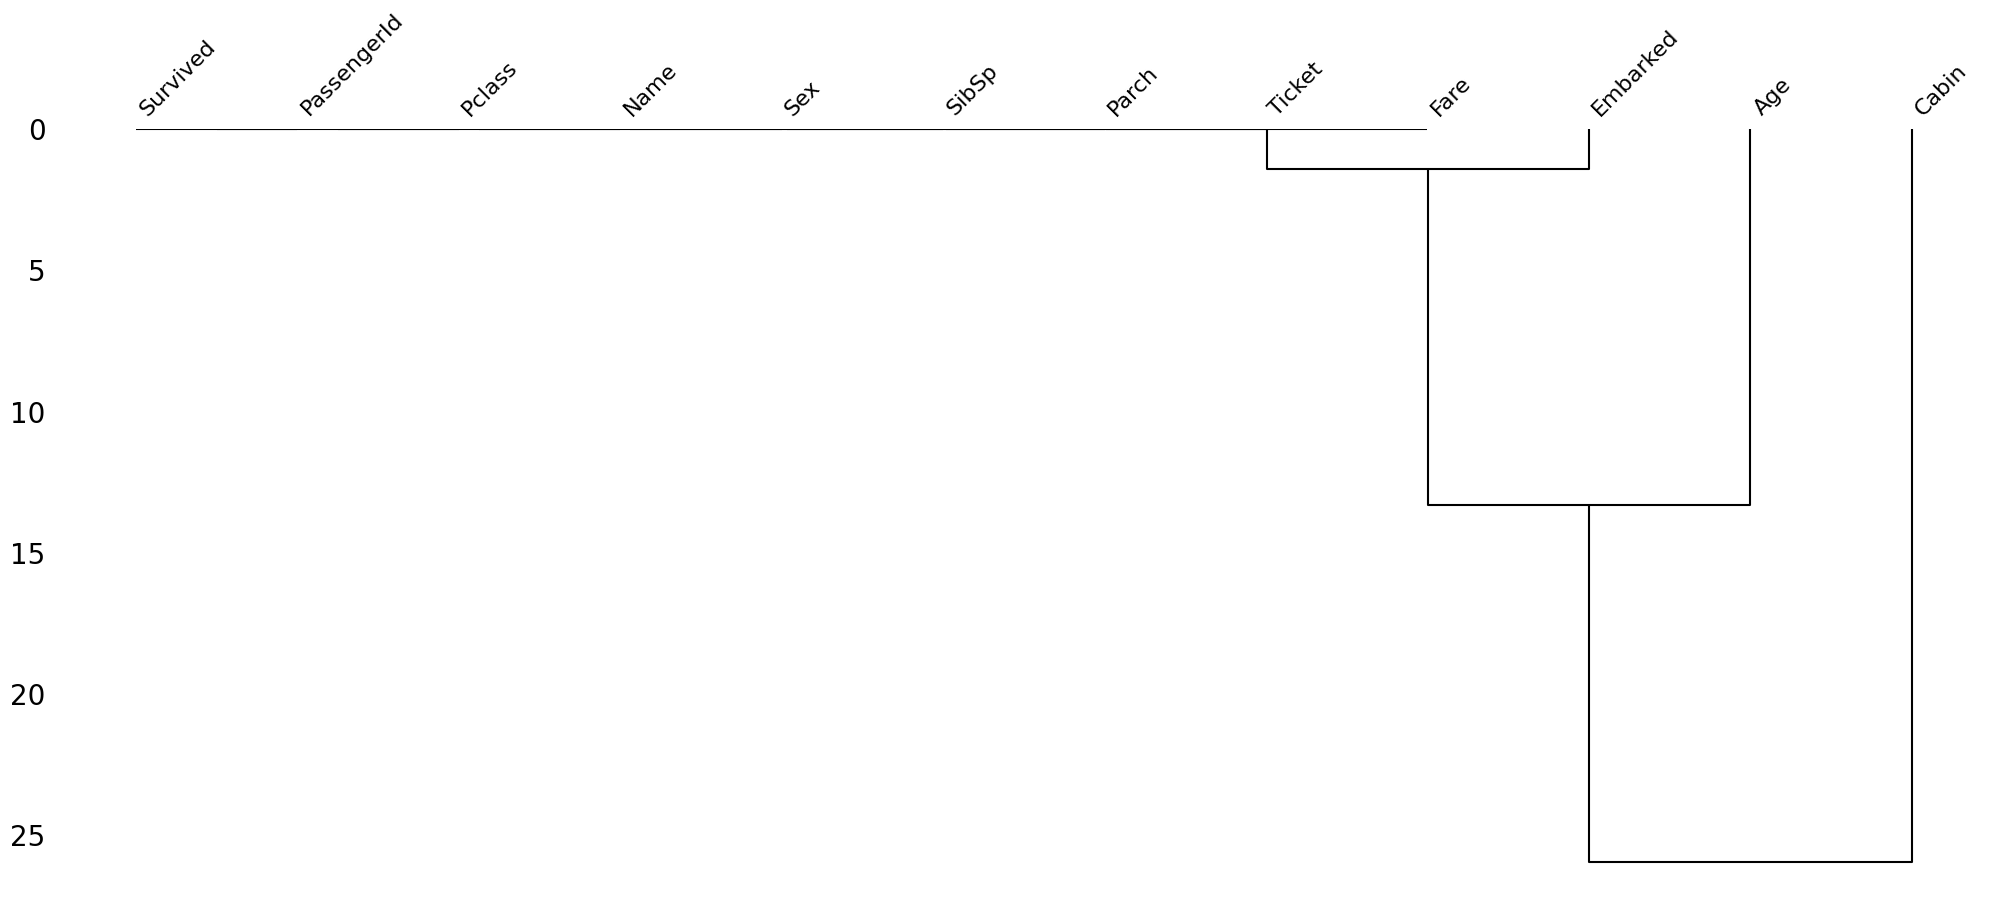

In [ ]:
msno.dendrogram(train)

Leamos el dendrograma anterior desde una perspectiva descendente:

* Las hojas de los clusters que se enlazan a una distancia de cero predicen completamente la presencia de la otra, una variable puede estar siempre vacía cuando otra está llena, o ambas pueden estar siempre llenas o ambas vacías, y así sucesivamente (missingno documentacion)

* la ausencia de Embarked tiende a ser más similar a Age que a Cabin, etc. Sin embargo, en este caso concreto, la correlación es alta, ya que la columna Embarked tiene muy pocos valores ausentes.

Este conjunto de datos no tiene muchos valores ausentes, pero si se utiliza la misma metodología en conjuntos de datos con muchos valores faltantes, sin duda surgirá algún patrón interesante.

# Tratamiento de los valores ausentes

Una vez identificados los patrones de los valores que faltan, es importante tratarlos. He aquí un diagrama de flujo que puede resultar útil:


## Supresiones

![](https://imgur.com/tBvdfyX.png)

>Borrar significa eliminar los valores que faltan de un conjunto de datos. Sin embargo, esto no es recomendable, ya que podría resultar en la pérdida de información del conjunto de datos. Sólo deberíamos eliminar los valores que faltan de un conjunto de datos si su proporción es muy pequeña. Las supresiones pueden ser de tres tipos:

### Borrado por pares

La eliminación por pares se utiliza cuando faltan valores de forma completamente aleatoria, es decir, MCAR. Durante la eliminación por pares, sólo se excluyen o eliminan los valores que faltan. Todas las operaciones en pandas como media, suma, etc intrínsecamente omiten los valores perdidos.

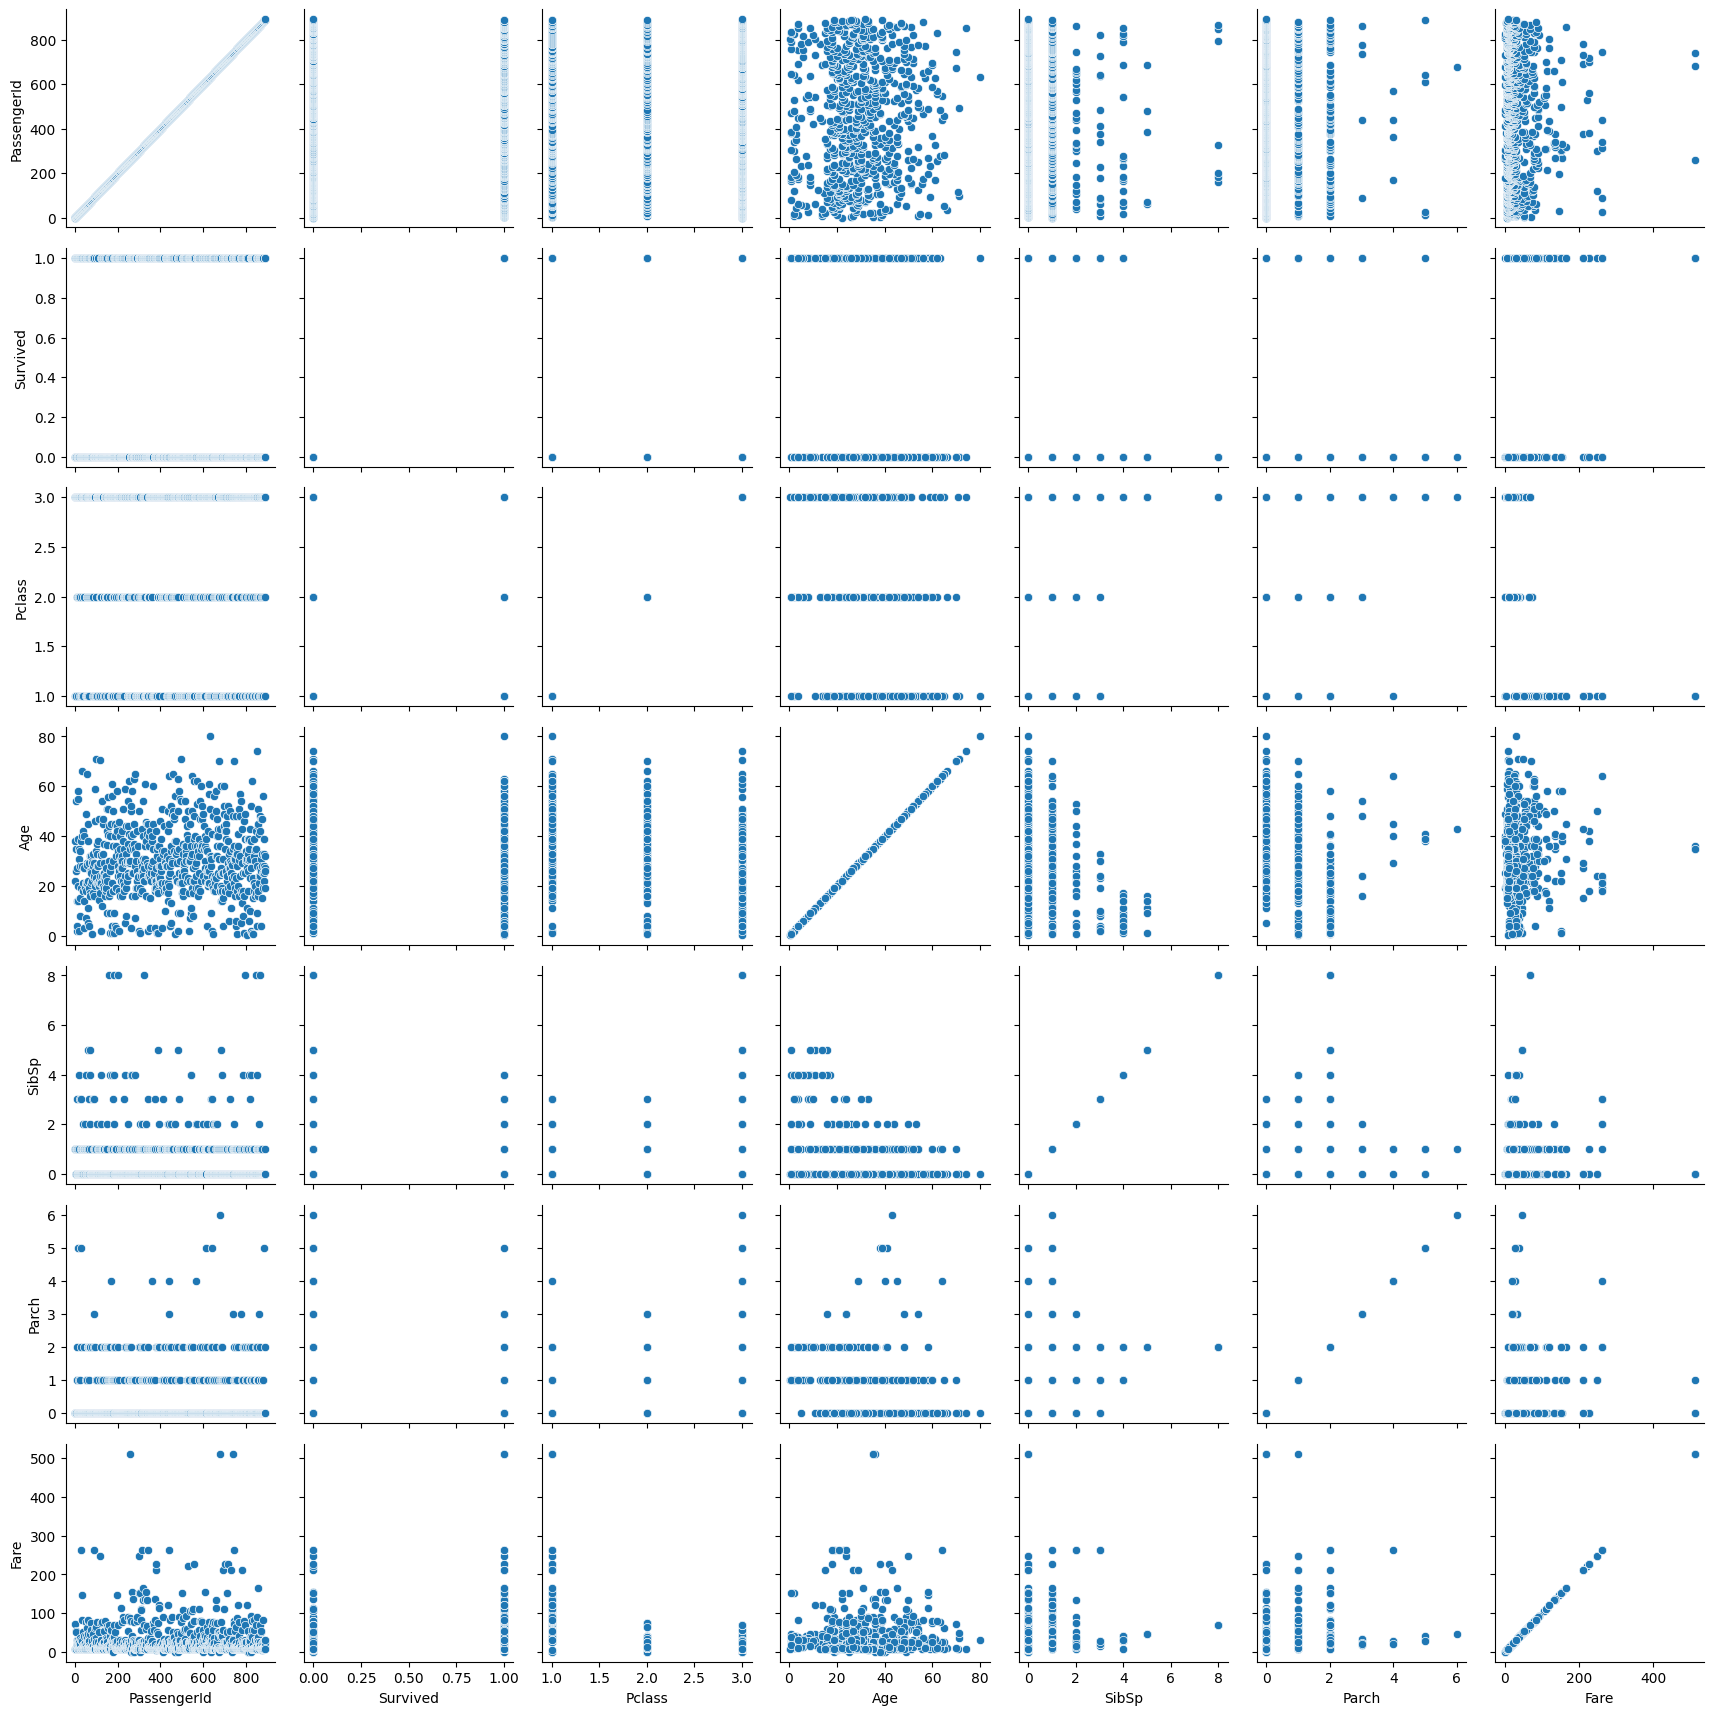

In [ ]:
g = sns.PairGrid(train)
g.map(sns.scatterplot)

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [ ]:
train_1 = train.copy()
train_1['Age'].mean()

29.69911764705882


### Eliminación de filas

>Durante el borrado Listwise Deletion/ Dropping rows, se borran las filas completas (que contienen los valores que faltan). Por ello, también se denomina eliminación de casos completos.

In [ ]:
?pd.DataFrame.dropna

In [ ]:
train_1.dropna(subset=['Age'],how='any', inplace=True)
train_1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

>Una de las principales desventajas de la eliminación por listas es que se pierde una parte importante de los datos y, por tanto, mucha información. Por lo tanto, es aconsejable utilizarla sólo cuando el número de valores que faltan es muy pequeño.


### Eliminación de columnas completas

Si una columna contiene muchos valores faltantes, digamos más del 80%, y la característica no es significativa, es posible que desee eliminar esa característica. Sin embargo, de nuevo, no es recomendable borrar datos.

El siguiente código elimina aquellas columans que tienen datos nulos:

In [ ]:
train_1 = train.copy()
train_1.dropna(axis=1, inplace=True)
train_1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

Para eliminar columnas en lugar de filas en un DataFrame, puedes utilizar el método `drop()` de pandas.

In [ ]:
train_1.drop(['Name'], axis=1, inplace=True)
train_1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

## Técnicas de imputación para datos no en series temporales

![](https://imgur.com/bL0iHde.png)

>La imputación consiste en sustituir los datos que faltan por valores sustituidos. Existen muchas formas de imputar los valores que ausentes, la selección del metodo se haya en funcion de la naturaleza del problema y la de los datos.

### Técnicas básicas de imputación

  - Imputación con un valor constante
  - Imputación utilizando estadísticos (media, mediana o más frecuente) de cada columna en la que se encuentran los valores que faltan



**`fillna()` de Pandas**

Pandas proporciona la función fillna() para reemplazar valores faltantes con un valor específico.

[fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

In [ ]:
?pd.DataFrame.fillna

In [ ]:
# Por una constante
train_1 = train.copy()
display(train_1.head())
train_1.fillna(0,inplace = True)
display(train_1.isnull().sum())
display(train_1.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [ ]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
# Algunas columnas tienen valores faltantes. Me interesa mostrar registros que tengan valores faltantes - nulos
train.loc[train.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


¿Esto esta bien? ¿porque?

In [ ]:
# Por la media
#train_1 = train.copy()
#display(train_1.head())
#train_1.fillna(train_1.mean(),inplace = True)
#display(train_1.isnull().sum())

In [ ]:
# Especificando
values = { "Age": train['Age'].mean(), "Embarked": train['Embarked'].mode()}
train_1 = train.copy()
display(train_1.loc[train_1.isnull().any(axis=1)].head(5))
train_1.fillna(values,inplace = True)
display(train_1.isnull().sum())
display(train_1.loc[train.isnull().any(axis=1)].head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S


In [ ]:
# Por columna
train_1 = train.copy()
display(train_1.loc[train_1.isnull().any(axis=1)].head(5))
train_1['Age'] = train_1['Age'].fillna(train_1['Age'].mean())
display(train_1.isnull().sum())
display(train_1.loc[train.isnull().any(axis=1)].head(5))



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S


In [ ]:
#train.mean(numeric_only=True)
#train['Cabin'].mode()

**`SimpleImputer` de sklearn**

[SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

>strategy: str, default=’mean’
The imputation strategy.
* If “mean”, then replace missing values using the mean along each column. Can only be used with numeric data.
* If “median”, then replace missing values using the median along each column. Can only be used with numeric data.
* If “most_frequent”, then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.
* If “constant”, then replace missing values with fill_value. Can be used with strings or numeric data.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Opción 1

In [ ]:
# importamos libreria
from sklearn.impute import SimpleImputer

In [ ]:
# copiamos
train_constant = train.copy()
#setting strategy to 'constant'
# creamos objeto de imputación

constant_imputer = SimpleImputer(strategy='constant') # imputing using constant value / fill_value=""


In [ ]:
constant_imputer

SimpleImputer(strategy='constant')

In [ ]:
display(train_constant.loc[train_constant.isnull().any(axis=1)].head(5))
# asignamos a dataframe

train_constant.iloc[:,:] = constant_imputer.fit_transform(train_constant)
display(train_constant.isnull().sum())
display(train_constant.loc[train.isnull().any(axis=1)].head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,missing_value,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,missing_value,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,missing_value,S
5,6,0,3,"Moran, Mr. James",male,missing_value,0,0,330877,8.4583,missing_value,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,missing_value,S


In [ ]:
?SimpleImputer

### Opción 2

In [ ]:

train_constant = train.copy()

#setting strategy to 'constant'
# creamos objeto de imputación

constant_imputer = SimpleImputer(strategy='constant') # imputing using constant value

train_constant = pd.DataFrame(constant_imputer.fit_transform(train_constant), columns = train_constant.columns)
display(train_constant.isnull().sum())
display(train_constant)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,missing_value,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,missing_value,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,missing_value,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0,missing_value,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,missing_value,1,2,W./C. 6607,23.45,missing_value,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0,C148,C


In [ ]:
type(constant_imputer.fit_transform(train_constant))

numpy.ndarray

In [ ]:
train_constant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    object
 1   Survived     891 non-null    object
 2   Pclass       891 non-null    object
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          891 non-null    object
 6   SibSp        891 non-null    object
 7   Parch        891 non-null    object
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    object
 10  Cabin        891 non-null    object
 11  Embarked     891 non-null    object
dtypes: object(12)
memory usage: 83.7+ KB


En el ejemplo dado, no se ha especificado un valor constante específico, por lo que el imputador utilizará el valor por defecto, que es 'missing_value'.

Si deseas especificar un valor constante diferente, puedes hacerlo proporcionando el parámetro `fill_value` al crear la instancia de SimpleImputer. Por ejemplo:

In [ ]:
# copiamos
train_constant = train.copy()


In [ ]:
# creamos objeto de imputación
contant_imputer = SimpleImputer(strategy='constant', fill_value=-999)
# aplicamos y asignamos
train_constant['Age'] = contant_imputer.fit_transform(train_constant[['Age']])

display(train_constant.isnull().sum())
display(train_constant)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-999.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train_constant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Pros:

- Trabaja con variables categóricas **sin necesidad de usar encodings** agregando una categoria mas.

### Cons:

- No tiene en cuenta las correlaciones entre las variables.

- Puede introducir **SESGOS** en los datos.

- Tiene sentido cuando la categoria que quiero agregar tiene sentido.

In [ ]:
from sklearn.impute import SimpleImputer
train_most_frequent = train.copy()

#setting strategy to 'mean' to impute by the mean
# creamos objeto de imputación

most_frequent_imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median

# asignamos
train_most_frequent.iloc[:,:] = most_frequent_imputer.fit_transform(train_most_frequent)

display(train_most_frequent.isnull().sum())
display(train)
display(train_most_frequent)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C




### Pros:

- Anda bien con variables categóricas **sin necesidad de usar encodings**

### Cons:

- No tiene en cuenta las correlaciones entre las variables.

- Puede intruducir **SESGOS** en los datos.

#### Imputar con la media para las numericas y con la mas frecuente para las categoricas

In [ ]:
train_impute = train.copy()

categorical_columns = []
numeric_columns = []
for c in train_impute.columns:
    if train_impute[c].map(type).eq(str).any(): #check if there are any strings in column
        categorical_columns.append(c)
    else:
        numeric_columns.append(c)


train_numeric = train_impute[numeric_columns]
train_categorical = pd.DataFrame(train_impute[categorical_columns])

In [ ]:
train_numeric

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [ ]:
train_categorical

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [ ]:


from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
train_numeric = pd.DataFrame(mean_imputer.fit_transform(train_numeric), columns = train_numeric.columns, index=train_numeric.index) #only apply imputer to numeric columns

most_imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median
train_categorical.iloc[:,:] = most_imputer.fit_transform(train_categorical)


data_joined = pd.concat([train_numeric, train_categorical], axis = 1)

In [ ]:
data_joined

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Cabin,Embarked
0,1.0,0.0,3.0,22.000000,1.0,0.0,7.2500,"Braund, Mr. Owen Harris",male,A/5 21171,B96 B98,S
1,2.0,1.0,1.0,38.000000,1.0,0.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,3.0,1.0,3.0,26.000000,0.0,0.0,7.9250,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,B96 B98,S
3,4.0,1.0,1.0,35.000000,1.0,0.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,5.0,0.0,3.0,35.000000,0.0,0.0,8.0500,"Allen, Mr. William Henry",male,373450,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,27.000000,0.0,0.0,13.0000,"Montvila, Rev. Juozas",male,211536,B96 B98,S
887,888.0,1.0,1.0,19.000000,0.0,0.0,30.0000,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,889.0,0.0,3.0,29.699118,1.0,2.0,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,B96 B98,S
889,890.0,1.0,1.0,26.000000,0.0,0.0,30.0000,"Behr, Mr. Karl Howell",male,111369,C148,C


In [ ]:
data_joined.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Name           0
Sex            0
Ticket         0
Cabin          0
Embarked       0
dtype: int64

Existen diversar librerias trabajar con la limpieza de datos y la automatización. Usando [sklearn.pipeline import Pipeline](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_pipeline_display.html#sphx-glr-auto-examples-miscellaneous-plot-pipeline-display-py) ya se puede empezar.

Más ejemplos: [ver](https://stackoverflow.com/questions/57059571/how-to-use-simpleimputer-class-to-impute-missing-values-in-different-columns-wit)

## Imputar por la media

### Pros:

- Rápido y fácil

- Anda bien con datasets numéricos bien balanceados.

### Cons:

- No tiene en cuenta las correlaciones entre las variables.

- Solo trabaja a nivel de columna

- Da resultados pobres en categoricas codificadas (No debe ser usado con variables categóricas)

- No es muy preciso, y no hay cómputo para el error.


## Técnicas de imputación para problemas de series temporales

Veamos ahora las formas de imputar datos en un problema típico de series temporales. Tratar los valores perdidos en un problema de series temporales es un poco diferente. El método `fillna()` se utiliza para imputar valores perdidos en este tipo de problemas.

* Técnicas básicas de imputación
  - ffill' o 'pad' - Sustituir NaN s por el último valor observado
  - bfill' o 'backfill' - Sustituir los valores NaN por el siguiente valor observado
  - Método de interpolación lineal

### Conjunto de datos de series temporales

El conjunto de datos se llama [Air Quality Data in India (2015 - 2020)](https://www.kaggle.com/rohanrao/air-quality-data-in-india) y contiene datos sobre la calidad del aire e ICA (Índice de Calidad del Aire) a nivel horario y diario de varias estaciones de múltiples ciudades de la India. El conjunto de datos tiene muchos valores perdidos y es un problema clásico de series temporales.

In [ ]:
ruta_archivo = pathCurso + "city_day.csv"
city_day = pd.read_csv(ruta_archivo,parse_dates=True,index_col='Date')
city_day1 = city_day.copy(deep=True)
city_day1.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
city_day1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29531 entries, 2015-01-01 to 2020-07-01
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   PM2.5       24933 non-null  float64
 2   PM10        18391 non-null  float64
 3   NO          25949 non-null  float64
 4   NO2         25946 non-null  float64
 5   NOx         25346 non-null  float64
 6   NH3         19203 non-null  float64
 7   CO          27472 non-null  float64
 8   SO2         25677 non-null  float64
 9   O3          25509 non-null  float64
 10  Benzene     23908 non-null  float64
 11  Toluene     21490 non-null  float64
 12  Xylene      11422 non-null  float64
 13  AQI         24850 non-null  float64
 14  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(2)
memory usage: 3.6+ MB


En este cuaderno, vamos a mantener nuestro enfoque en los valores que faltan solamente. Como es evidente, city_day dataframe consiste en datos diarios del nivel de contaminación de algunas de las ciudades más importantes de la India.



In [ ]:
#Missing Values
city_day_missing = missing_values_table(city_day1)
city_day_missing

Your selected dataframe has 15 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Xylene,18109,61.3
PM10,11140,37.7
NH3,10328,35.0
Toluene,8041,27.2
Benzene,5623,19.0
AQI,4681,15.9
AQI_Bucket,4681,15.9
PM2.5,4598,15.6
NOx,4185,14.2
O3,4022,13.6


Faltan muchos valores y en algunas columnas, como Xileno y PM10, faltan más del 50% de los valores. Veamos ahora cómo podemos imputar estos valores que faltan.



In [ ]:

city_day1['Xylene'][50:70]


Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26      NaN
2015-02-27      NaN
2015-02-28      NaN
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
2015-03-06      NaN
2015-03-07     0.39
2015-03-08     0.63
2015-03-09     1.35
2015-03-10     1.74
2015-03-11     2.78
Name: Xylene, dtype: float64

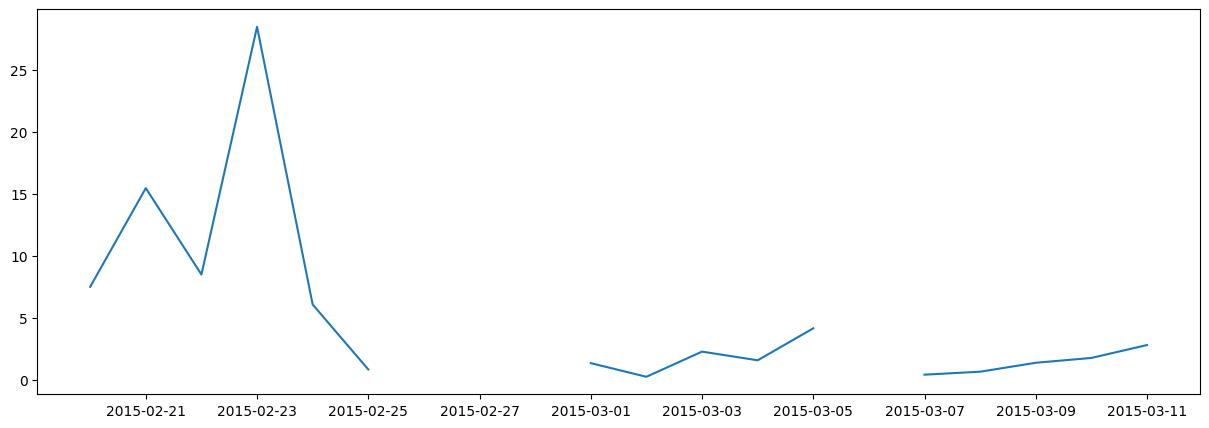

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot( city_day1['Xylene'][50:70])
plt.show()



Arriba vemos que faltan 3 valores en la columna Xileno, en ese rango.

### Imputación utilizando ffill

In [ ]:
city_day1.fillna(method='ffill',inplace=True)
city_day1['Xylene'][50:70]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26     0.81
2015-02-27     0.81
2015-02-28     0.81
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
2015-03-06     4.13
2015-03-07     0.39
2015-03-08     0.63
2015-03-09     1.35
2015-03-10     1.74
2015-03-11     2.78
Name: Xylene, dtype: float64

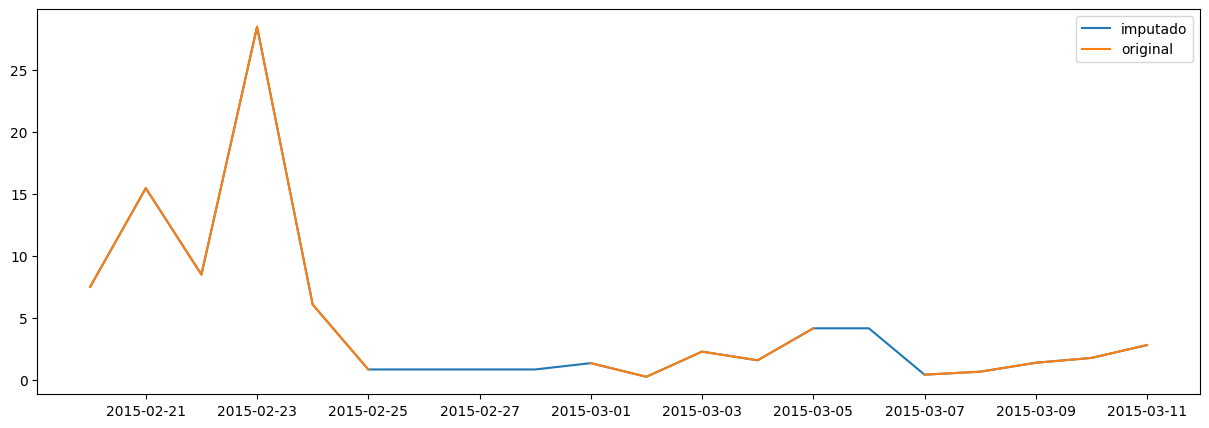

In [ ]:
plt.figure(figsize=(15, 5))

plt.plot(city_day1['Xylene'][50:70], label = "imputado")
plt.plot(city_day['Xylene'][50:70], label = "original")
plt.legend()
plt.show()

Podemos ver que todos los valores que faltan se han rellenado con los últimos valores observados.



### Imputación utilizando bfill

In [ ]:
# Imputing AQI value
city_day1 = city_day.copy()
city_day1['AQI'][50:70]

Date
2015-02-20     588.0
2015-02-21    1141.0
2015-02-22     669.0
2015-02-23    1247.0
2015-02-24     411.0
2015-02-25     292.0
2015-02-26       NaN
2015-02-27       NaN
2015-02-28       NaN
2015-03-01       NaN
2015-03-02     189.0
2015-03-03     408.0
2015-03-04     383.0
2015-03-05     780.0
2015-03-06       NaN
2015-03-07       NaN
2015-03-08     190.0
2015-03-09     233.0
2015-03-10     297.0
2015-03-11     330.0
Name: AQI, dtype: float64

In [ ]:
city_day1.fillna(method='bfill',inplace=True)
city_day1['AQI'][50:70]

Date
2015-02-20     588.0
2015-02-21    1141.0
2015-02-22     669.0
2015-02-23    1247.0
2015-02-24     411.0
2015-02-25     292.0
2015-02-26     189.0
2015-02-27     189.0
2015-02-28     189.0
2015-03-01     189.0
2015-03-02     189.0
2015-03-03     408.0
2015-03-04     383.0
2015-03-05     780.0
2015-03-06     190.0
2015-03-07     190.0
2015-03-08     190.0
2015-03-09     233.0
2015-03-10     297.0
2015-03-11     330.0
Name: AQI, dtype: float64

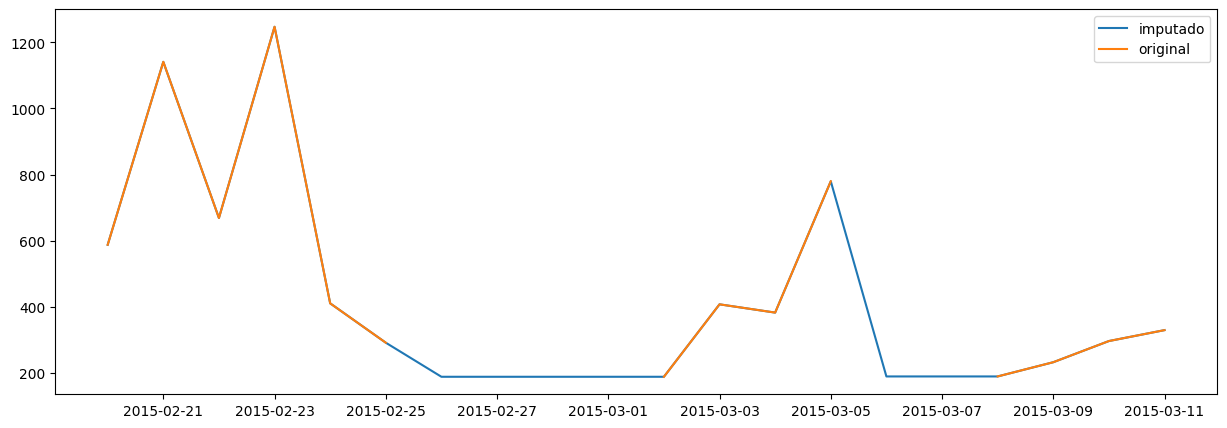

In [ ]:
plt.figure(figsize=(15, 5))

plt.plot(city_day1['AQI'][50:70], label = "imputado")
plt.plot(city_day['AQI'][50:70], label = "original")
plt.legend()
plt.show()

Podemos ver que todos los valores ausentes se han rellenado con los siguientes valores observados.

### Imputación mediante el método de interpolación lineal

Los datos de series temporales varían mucho con el tiempo. Por lo tanto, la imputación mediante el relleno con backfill y forward fill no es la mejor solución posible para abordar el problema. Una alternativa más adecuada sería emplear el método de interpolación, en el que los valores se rellenan con valores crecientes o decrecientes en función de la tendencia.

La [interpolación lineal](https://www.lexjansen.com/nesug/nesug01/ps/ps8026.pdf) es una técnica de imputación que asume una relación lineal entre los valores de los datos, este aprovecha los valores presentes de las variables adyacentes para calcular el valor para un punto ausente.

Consulte la documentación oficial para obtener una lista completa de estrategias de interpolación [aquí](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html)

In [ ]:
city_day1 = city_day.copy()
city_day1['Xylene'][50:70]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26      NaN
2015-02-27      NaN
2015-02-28      NaN
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
2015-03-06      NaN
2015-03-07     0.39
2015-03-08     0.63
2015-03-09     1.35
2015-03-10     1.74
2015-03-11     2.78
Name: Xylene, dtype: float64

In [ ]:
# Interpolate using the linear method
city_day1.interpolate(limit_direction="both",inplace=True)
city_day1['Xylene'][50:70]

Date
2015-02-20     7.4800
2015-02-21    15.4400
2015-02-22     8.4700
2015-02-23    28.4600
2015-02-24     6.0500
2015-02-25     0.8100
2015-02-26     0.9375
2015-02-27     1.0650
2015-02-28     1.1925
2015-03-01     1.3200
2015-03-02     0.2200
2015-03-03     2.2500
2015-03-04     1.5500
2015-03-05     4.1300
2015-03-06     2.2600
2015-03-07     0.3900
2015-03-08     0.6300
2015-03-09     1.3500
2015-03-10     1.7400
2015-03-11     2.7800
Name: Xylene, dtype: float64

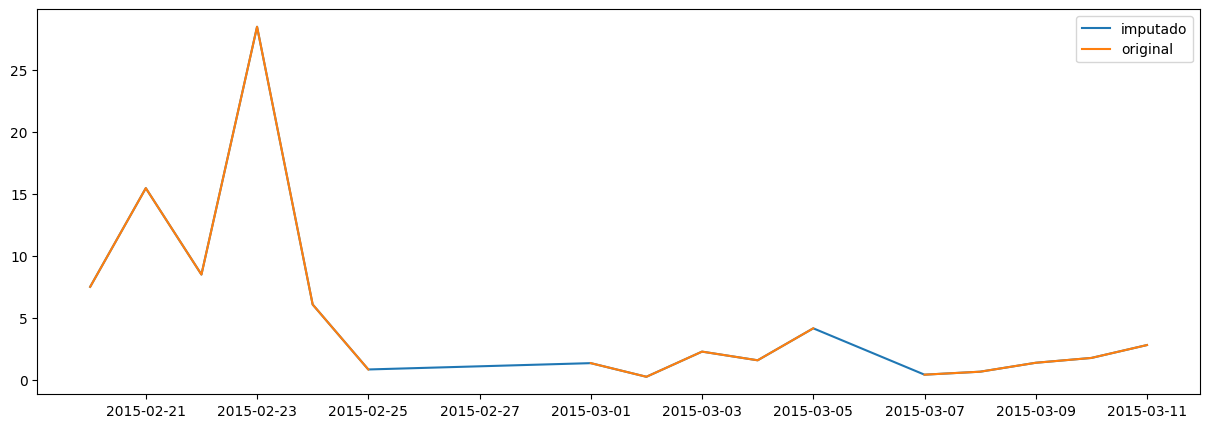

In [ ]:
plt.figure(figsize=(15, 5))

plt.plot(city_day1['Xylene'][50:70], label = "imputado")
plt.plot(city_day['Xylene'][50:70], label = "original")
plt.legend()
plt.show()

## Técnicas avanzadas de imputación

Las técnicas avanzadas de imputación utilizan algoritmos de aprendizaje automático para imputar los valores que faltan en un conjunto de datos, a diferencia de las técnicas anteriores, en las que utilizamos valores de otras columnas para predecir los valores ausentes. En este cuaderno examinaremos las siguientes dos técnicas:

* [Imputación de vecinos más cercanos](https://scikit-learn.org/stable/modules/impute.html#nearest-neighbors-imputation)
* [Multivariate feature imputation](https://scikit-learn.org/stable/modules/impute.html#multivariate-feature-imputation)

La clase [KNNImputer](https://scikit-learn.org/stable/modules/impute.html#multivariate-feature-imputation) proporciona la imputación para rellenar los valores que faltan utilizando el enfoque k-Nearest Neighbors. Cada característica que falta se imputa utilizando los valores de n_vecinos más cercanos que tienen un valor para la característica. Las características de los vecinos se promedian uniformemente o se ponderan en función de la distancia a cada vecino.

K-Nearest Neighbor es un algoritmo muy utilizado para una clasificación simple. El algoritmo utiliza "similitud de características" para predecir los valores de cualquier nuevo punto de datos. Esto significa que al nuevo punto se le asigna un valor en función de su parecido con los puntos del conjunto de entrenamiento. Esto es muy útil para hacer predicciones sobre  valores faltantes al encontrar los k-vecinos más cercanos a la observación con datos perdidos y luego imputarlos en función de los valores no perdidos en el vecindario.

Hay varias librerias que tienen este algoritmo

- <span style="color:FireBrick">**Fancyimpute**</span>

- <span style="color:FireBrick">**impyute**</span>

- <span style="color:FireBrick">**sklearn.impute**</span>

El siguiente codigo tiene un ejemplo del uso de la clase KNNImputer de Sklearn

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html
from sklearn.impute import KNNImputer


city_day_knn = city_day.copy(deep=True)

knn_imputer = KNNImputer(n_neighbors = 3) # , weights="uniform"
city_day_knn['Xylene'] = knn_imputer.fit_transform(city_day_knn[['Xylene']])

In [ ]:
city_day['Xylene'][50:70]

Date
2015-02-20     7.48
2015-02-21    15.44
2015-02-22     8.47
2015-02-23    28.46
2015-02-24     6.05
2015-02-25     0.81
2015-02-26      NaN
2015-02-27      NaN
2015-02-28      NaN
2015-03-01     1.32
2015-03-02     0.22
2015-03-03     2.25
2015-03-04     1.55
2015-03-05     4.13
2015-03-06      NaN
2015-03-07     0.39
2015-03-08     0.63
2015-03-09     1.35
2015-03-10     1.74
2015-03-11     2.78
Name: Xylene, dtype: float64

In [ ]:
city_day_knn['Xylene'][50:70]

Date
2015-02-20     7.480000
2015-02-21    15.440000
2015-02-22     8.470000
2015-02-23    28.460000
2015-02-24     6.050000
2015-02-25     0.810000
2015-02-26     3.070128
2015-02-27     3.070128
2015-02-28     3.070128
2015-03-01     1.320000
2015-03-02     0.220000
2015-03-03     2.250000
2015-03-04     1.550000
2015-03-05     4.130000
2015-03-06     3.070128
2015-03-07     0.390000
2015-03-08     0.630000
2015-03-09     1.350000
2015-03-10     1.740000
2015-03-11     2.780000
Name: Xylene, dtype: float64

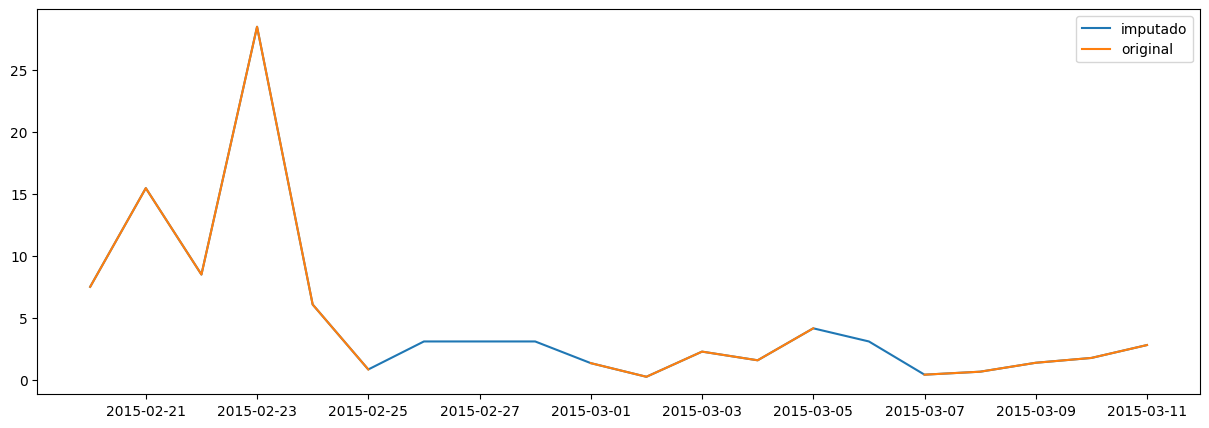

In [ ]:
plt.figure(figsize=(15, 5))

plt.plot(city_day_knn['Xylene'][50:70], label = "imputado")
plt.plot(city_day['Xylene'][50:70], label = "original")
plt.legend()
plt.show()

**¿Qué pasa si trabajo con las variables categóricas?**

In [ ]:
from sklearn.impute import KNNImputer


city_day_knn = city_day.copy(deep=True)

knn_imputer = KNNImputer(n_neighbors = 3) # , weights="uniform"
knn_imputer.fit_transform(city_day_knn)

ValueError: could not convert string to float: 'Ahmedabad'

KNNImputer no es adecuado para valores categóricos (tanto ordinales como nominales), ya que, como se indica en los documentos de scikit-learn [doc](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html):



> Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close.

Utiliza la media de los vecinos mientras que en su lugar necesita la moda, o una categoría en general.

En general,  para imputar valores categóricos faltantes se sugiere convertir los valores categóricos no faltantes a valores ordinales o numéricos, imputar los valores transformados y, por último, volver a convertirlos a valores categóricos.

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder


In [ ]:
missing_values_table(city_day)

Your selected dataframe has 15 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Xylene,18109,61.3
PM10,11140,37.7
NH3,10328,35.0
Toluene,8041,27.2
Benzene,5623,19.0
AQI,4681,15.9
AQI_Bucket,4681,15.9
PM2.5,4598,15.6
NOx,4185,14.2
O3,4022,13.6


In [ ]:
missing_categoricas = [col for col in city_day.columns if city_day[col].isnull().sum() > 0 and  city_day[col].dtypes == 'O']

In [ ]:
missing_categoricas

['AQI_Bucket']

In [ ]:
city_day['AQI_Bucket'].isnull().mean()*100

15.851139480545868

<Axes: xlabel='AQI_Bucket'>

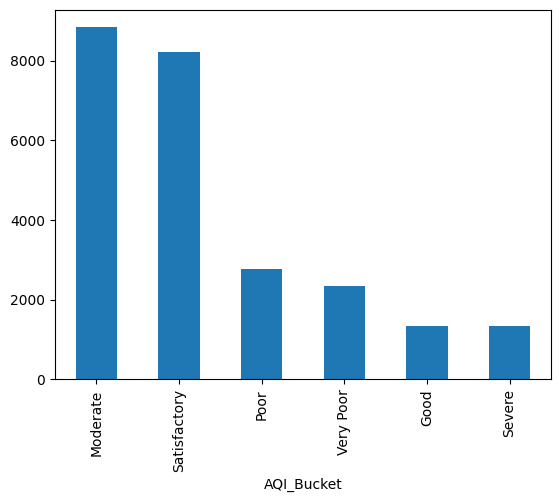

In [ ]:
city_day['AQI_Bucket'].value_counts().plot.bar()

In [ ]:
# crear objeto OrdinalEncoder
encoder = OrdinalEncoder()

# seleccionar los not null
nonulls = city_day['AQI_Bucket']
nonulls = nonulls[nonulls.notnull()]

# reshapes los datos para encoding
impute_reshape = nonulls.values.reshape(-1,1)
impute_reshape

#encode dato
impute_ordinal = encoder.fit_transform(impute_reshape)
impute_ordinal

#Asignar valores codificados nuevamente a valores no nulos
nonulls.loc[nonulls.notnull()] = np.squeeze(impute_ordinal)

In [ ]:
nonulls

Date
2015-01-29    2.0
2015-01-30    5.0
2015-01-31    4.0
2015-02-01    4.0
2015-02-02    4.0
             ... 
2020-06-27    0.0
2020-06-28    3.0
2020-06-29    3.0
2020-06-30    3.0
2020-07-01    0.0
Name: AQI_Bucket, Length: 24850, dtype: object

In [ ]:
def encode(data,encoder):

    # seleccionar los not null

    nonulls = data[data.notnull()]


    # reshapes los datos para encoding
    impute_reshape = nonulls.values.reshape(-1,1)


    #encode dato
    impute_ordinal = encoder.fit_transform(impute_reshape)


    #Asignar valores codificados nuevamente a valores no nulos
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)

    return data

In [ ]:
# Para todas las variables categoricas
city_day_knn = city_day.copy(deep=True)
ordinal_enc_dic  = {}

encoder_ord = OrdinalEncoder()
for col_name in missing_categoricas:
  # encoder para cada variable
  ordinal_enc_dic[col_name] = OrdinalEncoder()
  encode(city_day_knn[col_name],ordinal_enc_dic[col_name])



<ipython-input-115-1e587d7e5844>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data.notnull()] = np.squeeze(impute_ordinal)


In [ ]:
city_day_knn['AQI_Bucket'].loc[city_day_knn['AQI_Bucket'].notnull()]


Date
2015-01-29    2.0
2015-01-30    5.0
2015-01-31    4.0
2015-02-01    4.0
2015-02-02    4.0
             ... 
2020-06-27    0.0
2020-06-28    3.0
2020-06-29    3.0
2020-06-30    3.0
2020-07-01    0.0
Name: AQI_Bucket, Length: 24850, dtype: object

In [ ]:
city_day_knn.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
# imputamos
knn_imputer = KNNImputer(n_neighbors = 3) # , weights="uniform"
city_day_knn.iloc[:,1:]  = np.round(knn_imputer.fit_transform(city_day_knn.iloc[:,1:] ))


In [ ]:
city_day_knn.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,27.0,186.0,1.0,18.0,17.0,10.0,1.0,28.0,133.0,0.0,0.0,0.0,101.0,2.0
2015-01-02,Ahmedabad,24.0,164.0,1.0,16.0,16.0,10.0,1.0,25.0,34.0,4.0,6.0,4.0,121.0,2.0
2015-01-03,Ahmedabad,78.0,182.0,17.0,19.0,30.0,9.0,17.0,29.0,31.0,7.0,16.0,2.0,205.0,3.0
2015-01-04,Ahmedabad,43.0,229.0,2.0,18.0,18.0,10.0,2.0,19.0,36.0,4.0,10.0,1.0,153.0,1.0
2015-01-05,Ahmedabad,136.0,259.0,22.0,21.0,38.0,9.0,22.0,39.0,39.0,7.0,19.0,3.0,324.0,3.0


In [ ]:
city_day_knn.isnull().mean()*100

City          0.0
PM2.5         0.0
PM10          0.0
NO            0.0
NO2           0.0
NOx           0.0
NH3           0.0
CO            0.0
SO2           0.0
O3            0.0
Benzene       0.0
Toluene       0.0
Xylene        0.0
AQI           0.0
AQI_Bucket    0.0
dtype: float64

In [ ]:
for col_name in missing_categoricas:
    # reshapes los datos para encoding
    reshape = city_day_knn[col_name].values.reshape(-1,1)
    city_day_knn.loc[:,col_name] = ordinal_enc_dic['AQI_Bucket'].inverse_transform(reshape) # inverse_transform devuelve un numpy.ndarray


In [ ]:
city_day_knn.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,27.0,186.0,1.0,18.0,17.0,10.0,1.0,28.0,133.0,0.0,0.0,0.0,101.0,Poor
2015-01-02,Ahmedabad,24.0,164.0,1.0,16.0,16.0,10.0,1.0,25.0,34.0,4.0,6.0,4.0,121.0,Poor
2015-01-03,Ahmedabad,78.0,182.0,17.0,19.0,30.0,9.0,17.0,29.0,31.0,7.0,16.0,2.0,205.0,Satisfactory
2015-01-04,Ahmedabad,43.0,229.0,2.0,18.0,18.0,10.0,2.0,19.0,36.0,4.0,10.0,1.0,153.0,Moderate
2015-01-05,Ahmedabad,136.0,259.0,22.0,21.0,38.0,9.0,22.0,39.0,39.0,7.0,19.0,3.0,324.0,Satisfactory


### Pros:

- Rápido y fácil

- Anda bien con datasets numéricos bien balanceados.

### Cons:

- Usa distancias calculadas usando los casos, aun cuando tengan NaN's, pero deben ser todas variables numericas.

- Antes de imputar, hay que codificar las variables, usando HotEncoding, LabelEncoding o OrdinalEncoding

- KNN Imputer precisa que los datos esten estandarizados. Datos con diferentes escalas introducen valores de reemplazo sesgados   Scikit-Learn’s MinMaxScaler escala las variables al [0,1].

- No es muy preciso, y no hay computo para el error.

- CouncilArea no puede ser imputada sin realizar encoding primero.

### Multivariate feature imputation - Imputación multivariante por ecuaciones encadenadas (MICE - ‘Multiple Imputation by Chained Equation)
Una estrategia para imputar valores ausentes es modelando cada característica con valores ausentes como una función de otras características con valores presentes de forma rotatoria. Realiza regresiones múltiples sobre una muestra aleatoria de los datos, luego toma el promedio de los valores de regresión múltiple y utiliza ese valor para imputar el valor que falta.

Este tipo de imputación funciona llenando los datos faltantes varias veces. Las imputaciones múltiples (IM) son mucho mejores que una sola imputación, ya que mide la incertidumbre de los valores perdidos de una mejor manera. El enfoque de ecuaciones encadenadas también es muy flexible y puede manejar diferentes variables de diferentes tipos de datos (es decir, continuos o binarios), así como complejidades como límites o patrones de omisión de encuestas.

La version de Sklearn no permite trabajar con variables de distinto tipo, hay que realizar encoding. En sklearn, se implementa de la siguiente manera:



In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [ ]:
city_day_mice = city_day.copy(deep=True)


In [ ]:
missing_mask = city_day.isna()
city_day_mice[missing_mask.any(axis=1)].head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
?IterativeImputer

In [ ]:
# creamos objeto de imputación mice
mice_imputer = IterativeImputer()
city_day_mice['Xylene'] = mice_imputer.fit_transform(city_day_mice[['Xylene']])

In [ ]:
city_day['Xylene'].describe()

count    11422.000000
mean         3.070128
std          6.323247
min          0.000000
25%          0.140000
50%          0.980000
75%          3.350000
max        170.370000
Name: Xylene, dtype: float64

In [ ]:
city_day_mice['Xylene'][50:70]

Date
2015-02-20     7.480000
2015-02-21    15.440000
2015-02-22     8.470000
2015-02-23    28.460000
2015-02-24     6.050000
2015-02-25     0.810000
2015-02-26     3.070128
2015-02-27     3.070128
2015-02-28     3.070128
2015-03-01     1.320000
2015-03-02     0.220000
2015-03-03     2.250000
2015-03-04     1.550000
2015-03-05     4.130000
2015-03-06     3.070128
2015-03-07     0.390000
2015-03-08     0.630000
2015-03-09     1.350000
2015-03-10     1.740000
2015-03-11     2.780000
Name: Xylene, dtype: float64

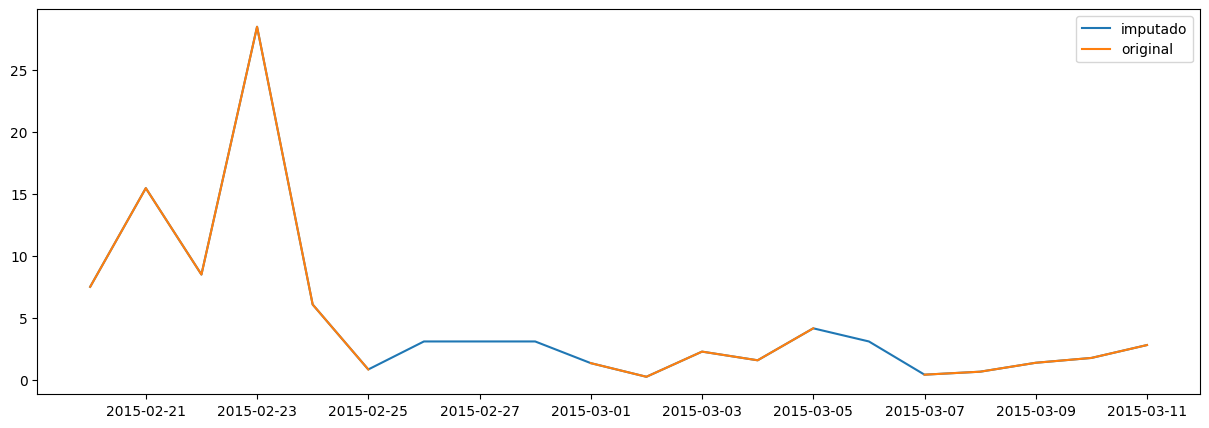

In [ ]:
plt.figure(figsize=(15, 5))

plt.plot(city_day_mice['Xylene'][50:70], label = "imputado")
plt.plot(city_day['Xylene'][50:70], label = "original")
plt.legend()
plt.show()

In [ ]:
city_day_mice['Xylene'].isnull().sum()

0

### Pros:

- Versatil, puede utilizarse con diferentes clases de clasificadores

### Cons

- La version de Sklearn no admite datos mixtos, debe realizarse un encoding primero.

# Conclusión

 No existe una forma perfecta de compensar los valores perdidos en un conjunto de datos. Cada estrategia puede funcionar mejor para ciertos conjuntos de datos y tipos de datos faltantes, pero puede funcionar mucho peor en otros tipos de conjuntos de datos. Hay algunas reglas establecidas para decidir qué estrategia usar para tipos particulares de valores perdidos, pero más allá de eso, debe experimentar y verificar qué modelo funciona mejor para su conjunto de datos.

# Referencias y buenos recursos

* [Dealing with Missing Data in Python](https://campus.datacamp.com/courses/dealing-with-missing-data-in-python/the-problem-with-missing-data?ex=1)
* [Cómo manejar los datos que faltan](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4)
* [Python data science handbook: handling missing data](https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html)
